<a href="https://colab.research.google.com/github/Muthikha/Predictive_Solar_analysis-with-RL/blob/main/Copy_of_(Final)_Occupancy_Prediction_for_HVAC_Control_System_Using_Environmental_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA CLEANING AND DATA PRE-PROCESSING**

In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
# Function to convert string to snake case
def to_snake_case(s):
    return s.lower().replace(" ", "_")

# Function to round up time from :59 to :00
def round_up_time(timestamp):
    dt = pd.to_datetime(timestamp)
    if dt.second == 59:
        return (dt + pd.Timedelta(seconds=1)).strftime('%Y-%m-%d %H:%M:%S')
    return dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Read the datasets into DataFrame objects
df1 = pd.read_csv('/datatraining.txt')
df2 = pd.read_csv('/datatest.txt')  # door open
df3 = pd.read_csv('/datatest2.txt')  # door closed

In [ ]:
# Merge all datasets into one large DataFrame for cleaning purposes
df = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
# Check for duplicate observations
duplicates = df.duplicated().value_counts()
print(duplicates)

# Check the shape of the DataFrame
print("DataFrame shape:", df.shape)
print("Dataset shapes:", df1.shape, df2.shape, df3.shape)
print(df.head()) # Peek at the data

False    20560
Name: count, dtype: int64
DataFrame shape: (20560, 7)
Dataset shapes: (8143, 7) (2665, 7) (9752, 7)
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
0  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
1  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
2  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
3  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
4  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
0          1  
1          1  
2          1  
3          1  
4          1  


In [ ]:
print(df1.describe())
print(df2.describe())
print(df3.describe())

       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000   
mean     20.619084    25.731507   119.519375   606.546243       0.003863   
std       1.016916     5.531211   194.755805   314.320877       0.000852   
min      19.000000    16.745000     0.000000   412.750000       0.002674   
25%      19.700000    20.200000     0.000000   439.000000       0.003078   
50%      20.390000    26.222500     0.000000   453.500000       0.003801   
75%      21.390000    30.533333   256.375000   638.833333       0.004352   
max      23.180000    39.117500  1546.333333  2028.500000       0.006476   

         Occupancy  
count  8143.000000  
mean      0.212330  
std       0.408982  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  
       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  2665.000000  2665.000000  2665.000000  2665

In [ ]:
# Round up timestamps in the main DataFrame
df['date'] = df['date'].map(lambda x: round_up_time(x))
df1['date'] = df1['date'].map(lambda x: round_up_time(x))
df2['date'] = df2['date'].map(lambda x: round_up_time(x))
df3['date'] = df3['date'].map(lambda x: round_up_time(x))

In [ ]:
# Check for missing values
print(df.isnull().sum())

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB
None


In [ ]:
# Rename all columns to follow snake-case conventions
df.columns = df.columns.map(lambda x: to_snake_case(x))
df1.columns = df1.columns.map(lambda x: to_snake_case(x))
df2.columns = df2.columns.map(lambda x: to_snake_case(x))
df3.columns = df3.columns.map(lambda x: to_snake_case(x))

In [ ]:
# Class value counts for each dataset
print(df['occupancy'].value_counts(normalize=True))
print(df1['occupancy'].value_counts(normalize=True))
print(df2['occupancy'].value_counts(normalize=True))
print(df3['occupancy'].value_counts(normalize=True))

occupancy
0    0.768969
1    0.231031
Name: proportion, dtype: float64
occupancy
0    0.78767
1    0.21233
Name: proportion, dtype: float64
occupancy
0    0.635272
1    0.364728
Name: proportion, dtype: float64
occupancy
0    0.789889
1    0.210111
Name: proportion, dtype: float64


In [ ]:
# Sort the observations by the date column
df.sort_values(by='date', inplace=True)
df1.sort_values(by='date', inplace=True)
df2.sort_values(by='date', inplace=True)
df3.sort_values(by='date', inplace=True)

In [ ]:
# Save the cleaned datasets to CSV and .p files
df.to_csv('/content/occupancy.csv', index=False)
df1.to_csv('/content/train.csv', index=False)
df2.to_csv('/content/test.csv', index=False)
df3.to_csv('/content/test2.csv', index=False)

# Save as .p files using pickle
with open('/content/occupancy.p', 'wb') as f:
    pickle.dump(df, f)
with open('/content/train.p', 'wb') as f:
    pickle.dump(df1, f)
with open('/content/test.p', 'wb') as f:
    pickle.dump(df2, f)
with open('/content/test2.p', 'wb') as f:
    pickle.dump(df3, f)

In [ ]:
# Create a combined dataset and save it
combined_df = pd.concat([df1, df2, df3], ignore_index=True)
combined_df.sort_values(by='date', inplace=True)
combined_df.to_csv('/content/combined_occupancy.csv', index=False)

with open('/content/combined_occupancy.p', 'wb') as f:
    pickle.dump(combined_df, f)

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler
from sklearn.preprocessing import StandardScaler
!apt-get install -y fonts-dejavu
import matplotlib.font_manager as fm
if hasattr(fm, '_rebuild'):
    fm._rebuild()

plt.rcParams['font.family'] = 'DejaVu Sans'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra
The following NEW packages will be installed:
  fonts-dejavu fonts-dejavu-core fonts-dejavu-extra
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,085 kB of archives.
After this operation, 10.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-extra all 2.37-2build1 [2,041 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-dejavu all 2.37-2build1 [3,192 B]
Fetched 3,085 kB in 0s (8,374 kB/s)
Selecting previously unselected package fonts-dejavu-core.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../fonts-dejavu-core_2.37-2build1_all.deb ...
Unpack

In [ ]:
# Load the dataset into a DataFrame object
df = pickle.load(open('/content/combined_occupancy.p', 'rb'))  # Adjusted the path
# Peek at the data
print("Head of the DataFrame:")
print(df.head())

print("\nTail of the DataFrame:")
print(df.tail())

Head of the DataFrame:
                     date  temperature  humidity       light         co2  \
8143  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
8144  2015-02-02 14:20:00      23.7180    26.290  578.400000  760.400000   
8145  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
8146  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
8147  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

      humidityratio  occupancy  
8143       0.004764          1  
8144       0.004773          1  
8145       0.004765          1  
8146       0.004744          1  
8147       0.004767          1  

Tail of the DataFrame:
                      date  temperature  humidity   light      co2  \
20555  2015-02-18 09:15:00       20.815   27.7175  429.75  1505.25   
20556  2015-02-18 09:16:00       20.865   27.7450  423.50  1514.50   
20557  2015-02-18 09:17:00       20.890   27.7450  423.50  1521.50   
20558  2015-02-18 

In [ ]:
# Generate Descriptive Statistics
title_fontname = 'Palatino'
title_fontsize = 16
label_fontsize = 14
title_pad = 20
title_color = 'navy'
label_color = 'navy'

describe = df.describe()
describe.drop('count', inplace=True)

# Print descriptive statistics
print("\nDescriptive Statistics:")
print(describe)


Descriptive Statistics:
      temperature   humidity        light          co2  humidityratio  \
mean    20.906212  27.655925   130.756622   690.553276       0.004228   
std      1.055315   4.982154   210.430875   311.201281       0.000768   
min     19.000000  16.745000     0.000000   412.750000       0.002674   
25%     20.200000  24.500000     0.000000   460.000000       0.003719   
50%     20.700000  27.290000     0.000000   565.416667       0.004292   
75%     21.525000  31.290000   301.000000   804.666667       0.004832   
max     24.408333  39.500000  1697.250000  2076.500000       0.006476   

      occupancy  
mean   0.231031  
std    0.421503  
min    0.000000  
25%    0.000000  
50%    0.000000  
75%    0.000000  
max    1.000000  


In [ ]:
import os

if not os.path.exists('/content/images'):
    os.makedirs('/content/images')
plt.savefig('/content/images/fig1.jpg', dpi=200)

<Figure size 640x480 with 0 Axes>

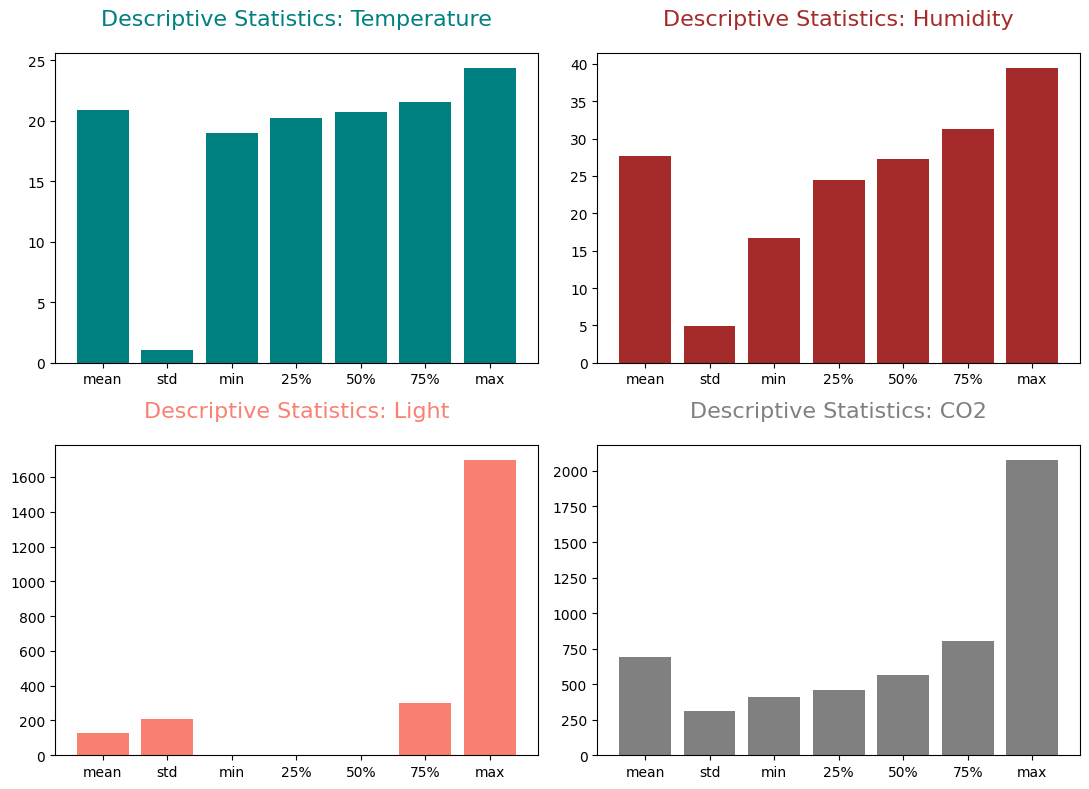

In [ ]:
# Visualize Descriptive Statistics
x = describe.index
y = describe.columns
colors = ['teal', 'brown', 'salmon', 'gray']
titles = ['Temperature', 'Humidity', 'Light', 'CO2']

f, a = plt.subplots(2, 2)
a = a.ravel()

f.set_figheight(8)
f.set_figwidth(11)

for idx, ax in enumerate(a):
    if idx < len(titles):  # Avoid index error
        ax.bar(x, describe[y[idx]], color=colors[idx])
        ax.set_title('Descriptive Statistics: ' + titles[idx], fontsize=16, color=colors[idx], pad=20)

plt.tight_layout()
# Save figures to the new directory
plt.savefig('/content/images/fig1.jpg', dpi=200)
plt.show()


Occupancy Value Counts:
occupancy
0    0.768969
1    0.231031
Name: proportion, dtype: float64


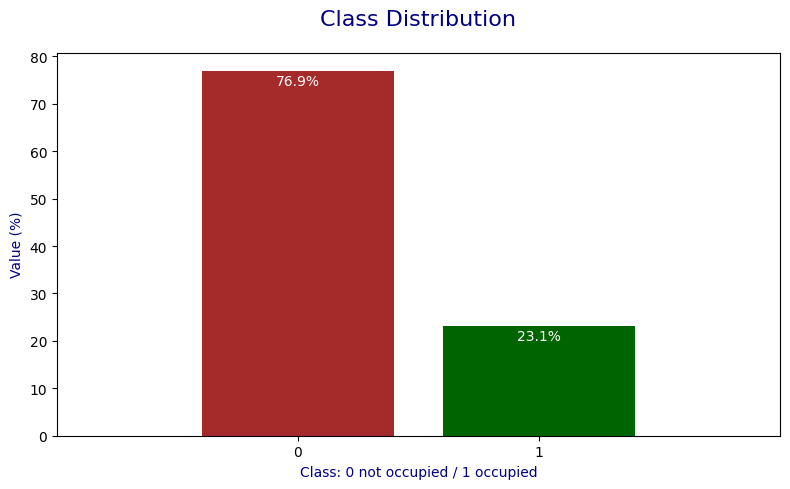

In [ ]:
# Check Occupancy Value Counts
classes = df['occupancy'].value_counts(normalize=True)
print("\nOccupancy Value Counts:")
print(classes)

x = classes.index
y = [np.round(val * 100, 2) for val in classes.values]

plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(8, 5))
bars = plt.bar(x, y, color=['brown', 'darkgreen'])
plt.title('Class Distribution', fontsize=16, color='navy', pad=20)
plt.xlabel('Class: 0 not occupied / 1 occupied', color='navy')
plt.xticks(rotation=0, ticks=[0, 1])
plt.xlim(-1, 2)
plt.ylabel('Value (%)', color='navy')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 3, str(yval) + '%', color='white', ha='center')

plt.tight_layout()

plt.savefig('/content/images/fig2.jpg', dpi=200)
plt.show()

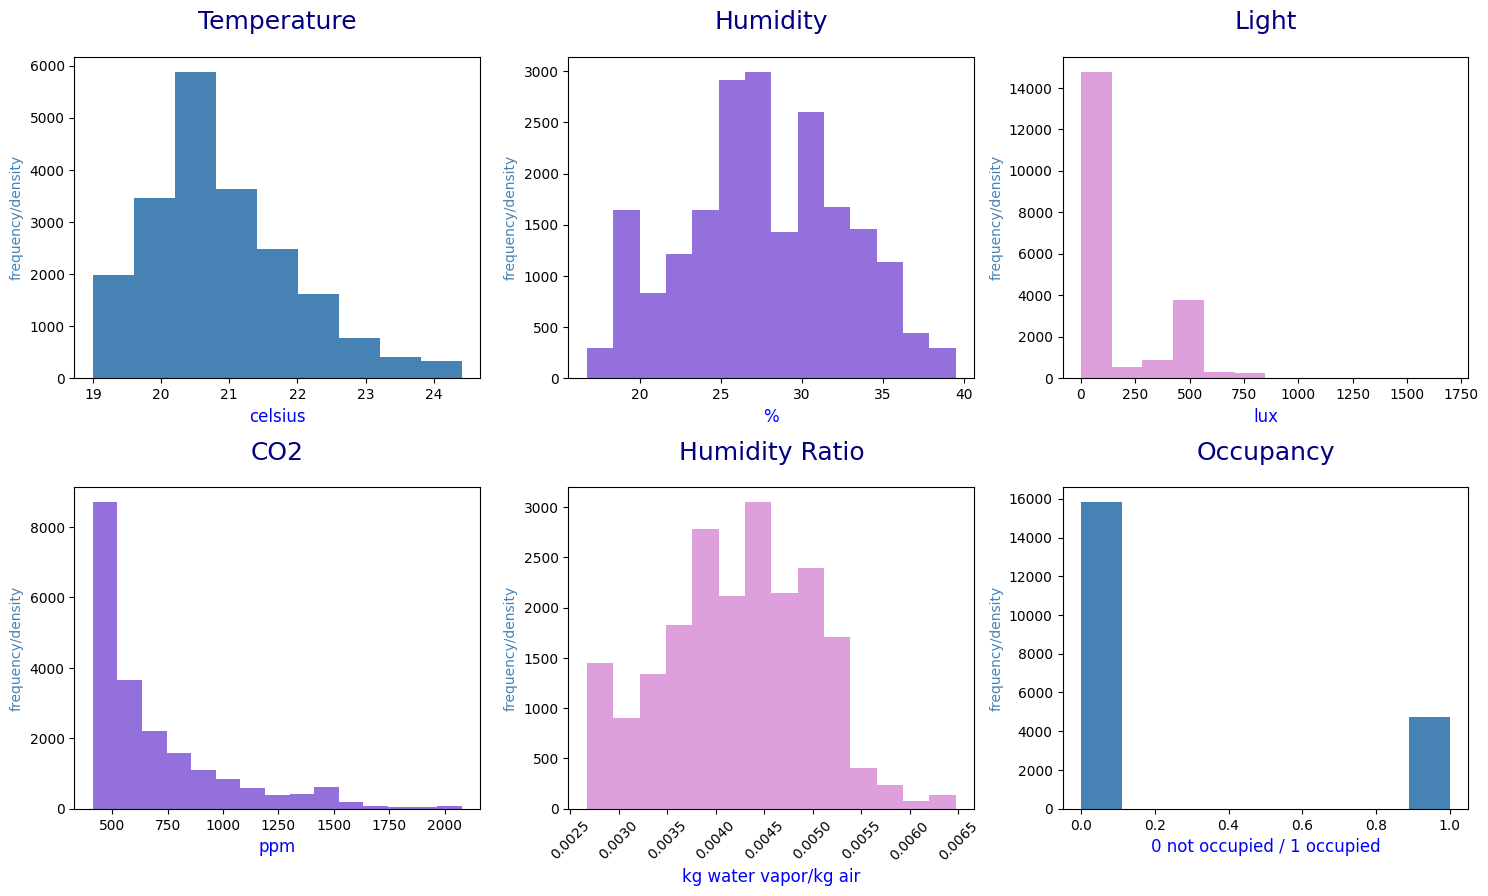

In [ ]:
# Histograms of Each Attribute
xaxes = ['temperature', 'humidity', 'light', 'co2', 'humidityratio', 'occupancy']
titles = ['Temperature', 'Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy']
units = ['celsius', '%', 'lux', 'ppm', 'kg water vapor/kg air', '0 not occupied / 1 occupied']
colors = ['steelblue', 'mediumpurple', 'plum', 'mediumpurple', 'plum', 'steelblue']
bins = [9, 14, 12, 15, 14, 9]

f, a = plt.subplots(2, 3, squeeze=False)
a = a.ravel()
f.set_figheight(9)
f.set_figwidth(15)

plt.rcParams['font.family'] = 'DejaVu Sans'

for idx, ax in enumerate(a):
    if idx == 4:
        ax.xaxis.set_visible(True)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
    if idx < len(xaxes):
        ax.hist(df[xaxes[idx]], bins=bins[idx], color=colors[idx])
        ax.set_title(titles[idx], fontsize=18, pad=20, fontname='DejaVu Sans', color='navy')
        ax.set_xlabel(units[idx], fontsize=12, color='blue')
        ax.set_ylabel('frequency/density', color='steelblue')

plt.tight_layout()
plt.savefig('/content/images/fig3.jpg', dpi=200)
plt.show()

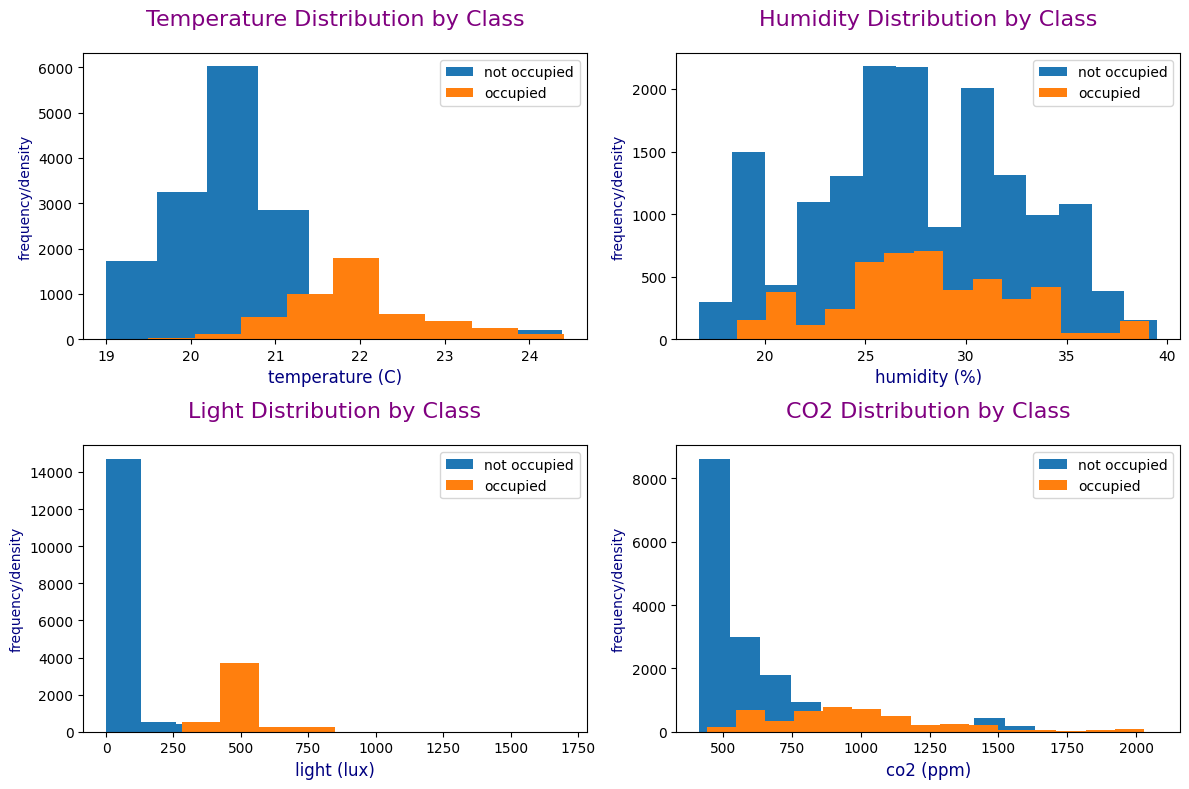

In [ ]:
# Histograms by Occupancy Class
xaxes = ['temperature', 'humidity', 'light', 'co2']
units = ['C', '%', 'lux', 'ppm']
titles = ['Temperature', 'Humidity', 'Light', 'CO2']
bins = [9, 14, 12, 15]

f, a = plt.subplots(2, 2, squeeze=False)
a = a.ravel()
f.set_figheight(8)
f.set_figwidth(12)

for idx, ax in enumerate(a):
    df.groupby('occupancy')[xaxes[idx]].hist(ax=ax, bins=bins[idx], grid=False)
    ax.set_title(titles[idx] + ' Distribution by Class', fontsize=16, color='purple', pad=20, fontname='DejaVu Sans')
    ax.set_xlabel(xaxes[idx] + ' (' + units[idx] + ')', fontsize=12, color='navy')
    ax.set_ylabel('frequency/density', fontsize=10, color='navy')
    ax.legend(loc=1, labels=['not occupied', 'occupied'])

plt.tight_layout()
plt.savefig('/content/images/fig26.jpg', dpi=200)
plt.show()

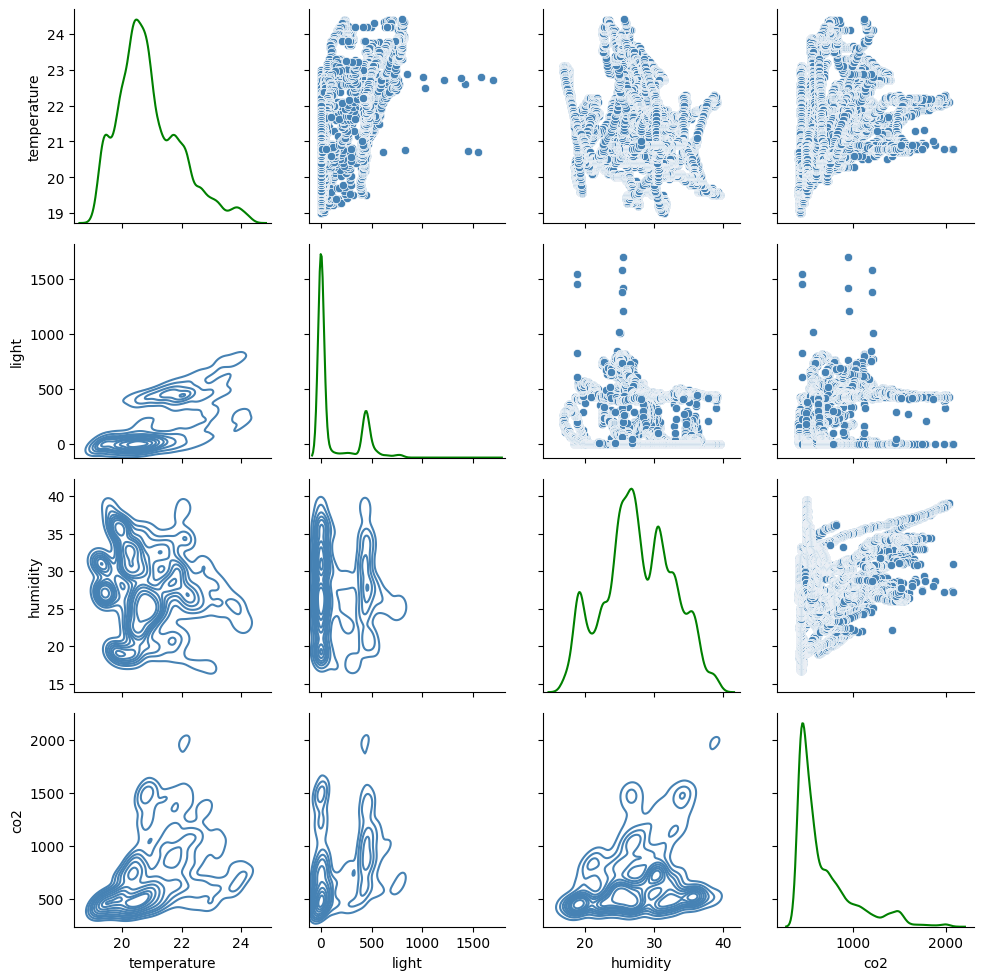

In [ ]:
# KDE and Scatter Plot PairGrid
g = sns.PairGrid(df[['temperature', 'light', 'humidity', 'co2']], diag_sharey=False)
g.map_upper(sns.scatterplot, color='steelblue')
g.map_diag(sns.kdeplot, color='green')
g.map_lower(sns.kdeplot, color='steelblue')
g.savefig('/content/images/fig21.jpg', dpi=200)
plt.show()

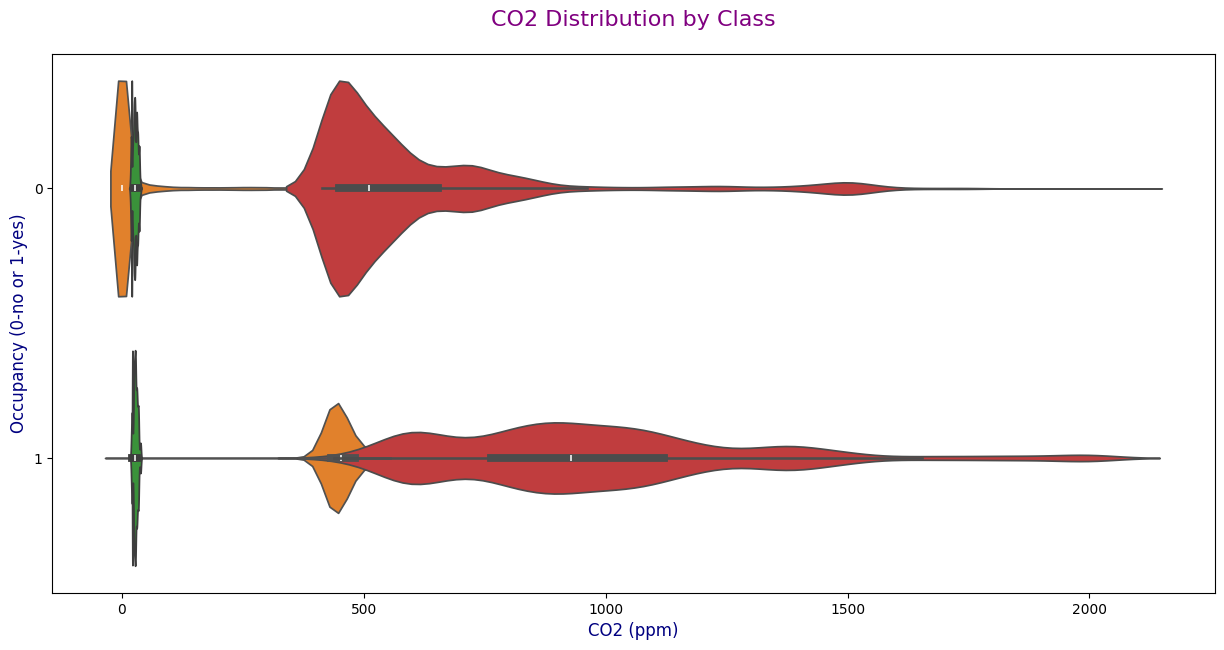

In [ ]:
# Violin Plots by Class
xs = ['temperature', 'light', 'humidity', 'co2']
titles = ['Temperature', 'Light', 'Humidity', 'CO2']
ylabels = ['Temperature (C)', 'Light (Lux)', 'Humidity (%)', 'CO2 (ppm)']

plt.rcParams['figure.figsize'] = (15, 7)

for i, x in enumerate(xs):
    boxplot = sns.violinplot(data=df, x=x, y='occupancy', orient='h')
    boxplot.set_title(titles[i] + ' Distribution by Class', fontsize=16, color='purple', pad=20, fontname='DejaVu Sans')
    boxplot.set_xlabel(ylabels[i], fontsize=12, color='navy')
    boxplot.set_ylabel('Occupancy (0-no or 1-yes)', fontsize=12, color='navy')
    fig = boxplot.get_figure()
    fig.savefig(f'/content/images/violinplot{i}.jpg')

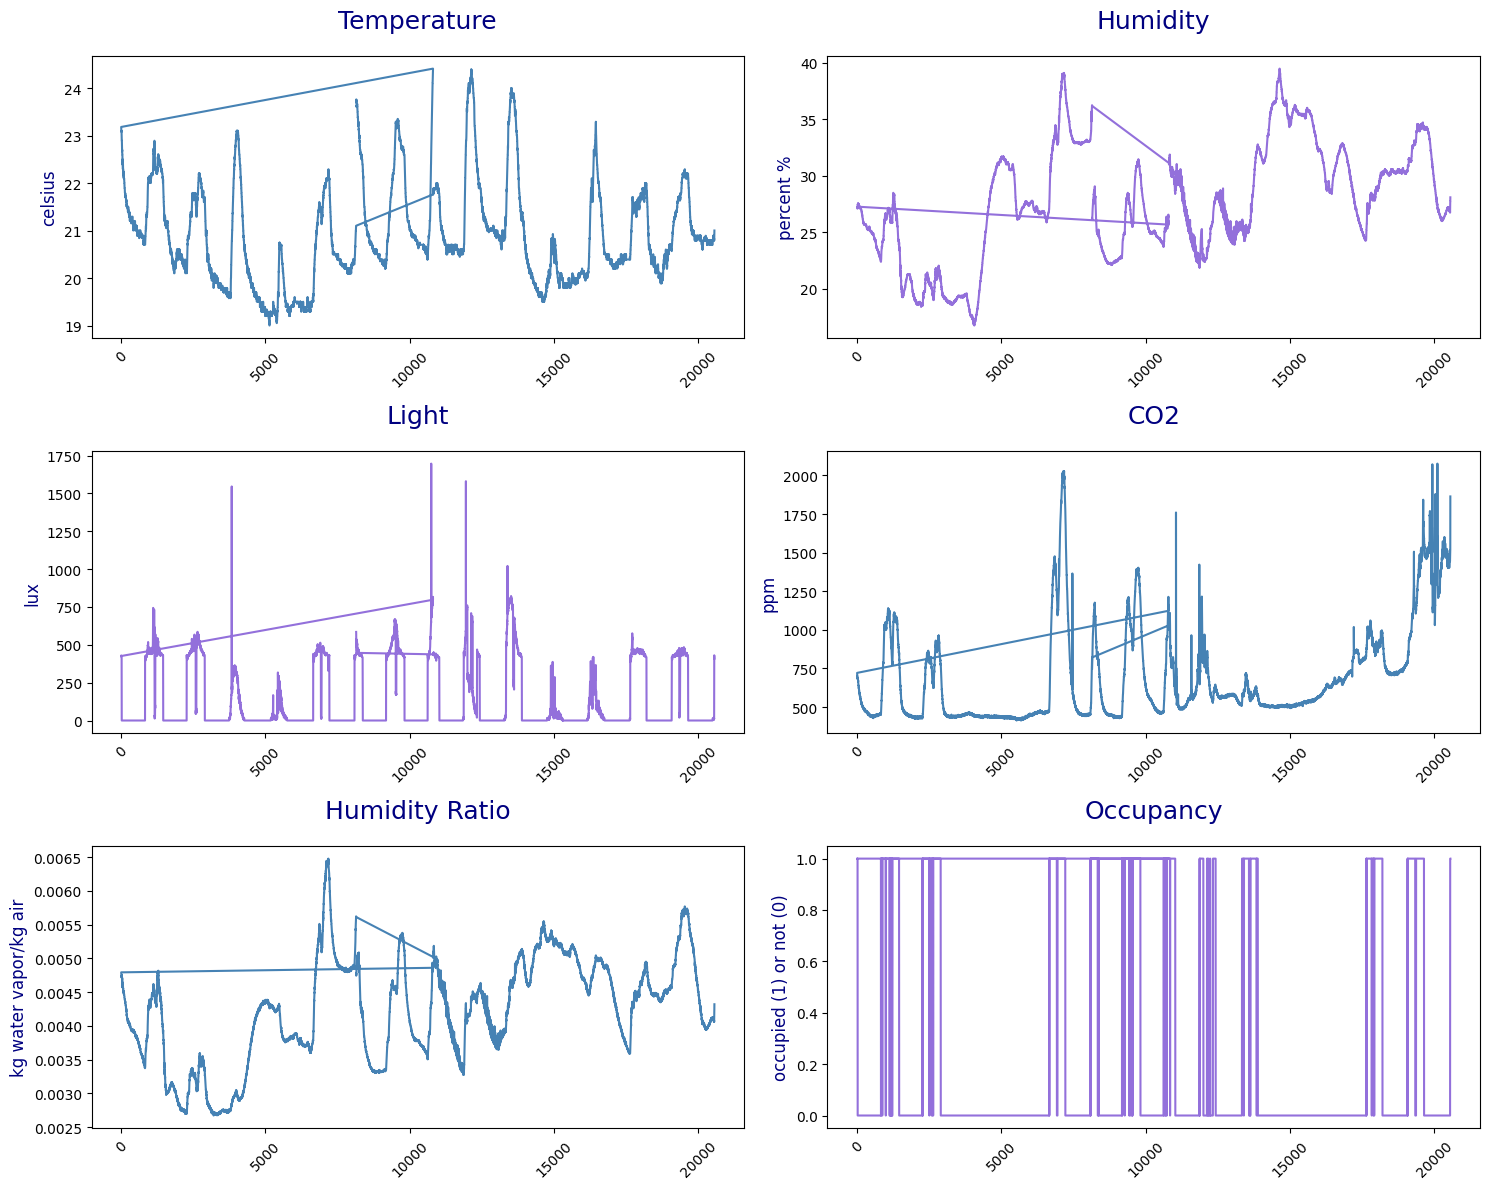

In [ ]:
# Line Plot for Each Attribute Over Time
xaxes = ['temperature', 'humidity', 'light', 'co2', 'humidityratio', 'occupancy']
yaxes = ['celsius', 'percent %', 'lux', 'ppm', 'kg water vapor/kg air', 'occupied (1) or not (0)']
titles = ['Temperature', 'Humidity', 'Light', 'CO2', 'Humidity Ratio', 'Occupancy']
colors = ['steelblue', 'mediumpurple', 'mediumpurple', 'steelblue', 'steelblue', 'mediumpurple']

f, a = plt.subplots(3, 2, squeeze=False)
a = a.ravel()
f.set_figheight(12)
f.set_figwidth(15)

for idx, ax in enumerate(a):
    ax.xaxis.set_visible(True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.plot(df.index, df[xaxes[idx]], color=colors[idx])
    ax.set_title(titles[idx], fontsize=18, pad=20, loc='center', color='navy', fontname='DejaVu Sans')
    ax.set_ylabel(yaxes[idx], color='navy', fontsize=12)

plt.tight_layout()
f.savefig('/content/images/fig4.jpg', dpi=200)
plt.show()

In [ ]:
occupancy_mean = df.groupby('occupancy').mean(numeric_only=True)
occupancy_mean

,temperature,humidity,light,co2,humidityratio
occupancy,,,,,
0,20.584830,27.529654,25.237893,604.996614,0.004120
1,21.975909,28.076209,481.967380,975.321870,0.004589


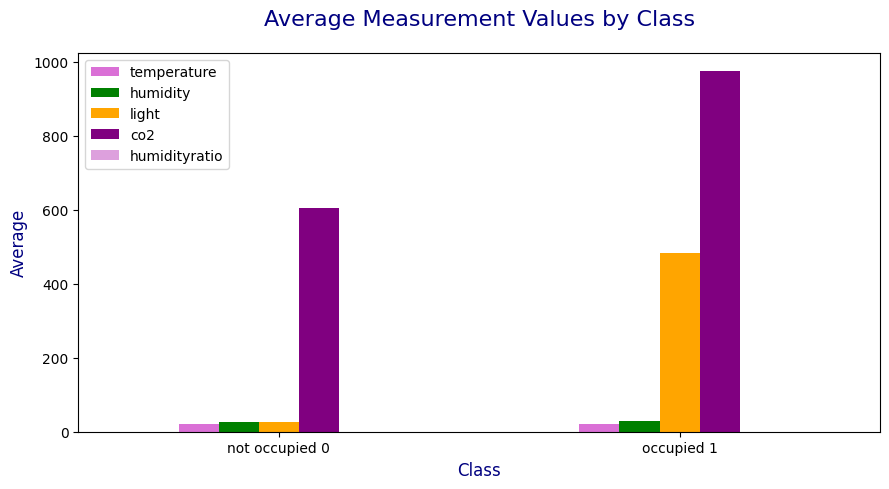

In [ ]:
colors = ['orchid', 'green', 'orange', 'purple', 'plum']

if 'weekday' in occupancy_mean.columns:
    occupancy_mean = occupancy_mean.drop(columns=['weekday'])

occupancy_mean.plot(kind='bar', figsize=(9, 5), color=colors)
plt.title('Average Measurement Values by Class', fontsize=16, pad=20, color='navy', fontname='DejaVu Sans')
plt.xlabel('Class', color='navy', fontsize=12)
plt.xticks(rotation=0, ticks=[0, 1], labels=['not occupied 0', 'occupied 1'])
plt.ylabel('Average', color='navy', fontsize=12)
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('/content/images/fig9.jpg', dpi=200)
plt.show()

In [ ]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')  # Convert 'date' to datetime
    df.set_index('date', inplace=True)  # Set 'date' as the index
else:
    print("No 'date' column found in the DataFrame!")

df = df[df.index.notnull()]

print("First few rows after fixing:")
print(df.head())
print("Last few rows after fixing:")
print(df.tail())

print("Unique dates in the DataFrame:")
unique_dates = df.index.normalize().unique()
print(unique_dates)

First few rows after fixing:
                     temperature  humidity       light         co2  \
date                                                                 
2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
2015-02-02 14:20:00      23.7180    26.290  578.400000  760.400000   
2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

                     humidityratio  occupancy  
date                                           
2015-02-02 14:19:00       0.004764          1  
2015-02-02 14:20:00       0.004773          1  
2015-02-02 14:21:00       0.004765          1  
2015-02-02 14:22:00       0.004744          1  
2015-02-02 14:23:00       0.004767          1  
Last few rows after fixing:
                     temperature  humidity   light      co2  humidityratio  \
date                                  

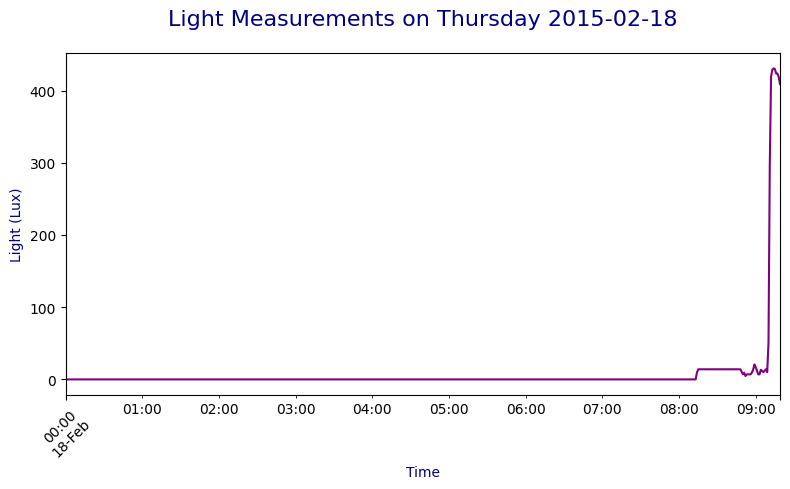

temperature        20.815000
humidity           27.417500
light             430.750000
co2              1511.750000
humidityratio       0.004167
occupancy           1.000000
Name: 2015-02-18 09:14:00, dtype: float64


In [ ]:
df_filtered = df.loc['2015-02-18']

if df_filtered.empty:
    print("No data available for the date 2015-02-18.")
else:
    plt.figure(figsize=(8, 5))
    df_filtered['light'].plot(color='purple')
    plt.title('Light Measurements on Thursday 2015-02-18', fontsize=16, color='navy', pad=20, fontname='DejaVu Sans')
    plt.xlabel('Time', color='navy')
    plt.ylabel('Light (Lux)', color='navy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('/content/images/fig10.jpg', dpi=200)
    plt.show()

    max_light_row = df_filtered.loc[df_filtered['light'].idxmax()]
    print(max_light_row)

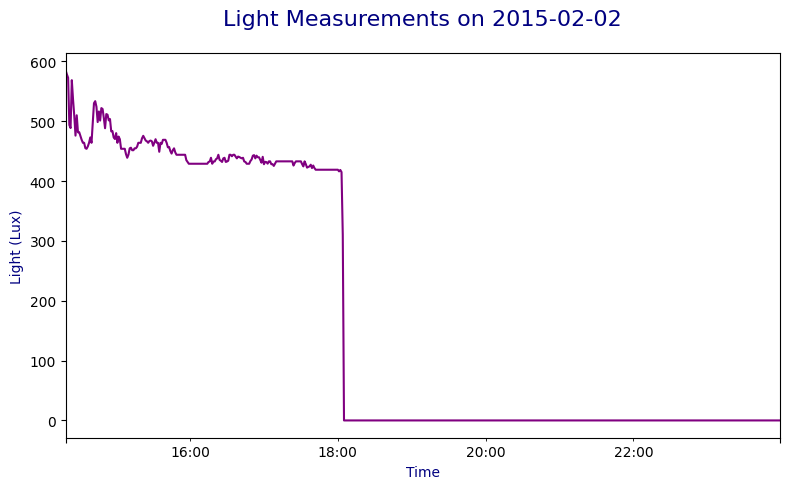

                     temperature  humidity       light         co2  \
date                                                                 
2015-02-02 14:19:00      23.7000   26.2720  585.200000  749.200000   
2015-02-02 14:20:00      23.7180   26.2900  578.400000  760.400000   
2015-02-02 14:21:00      23.7300   26.2300  572.666667  769.666667   
2015-02-02 14:22:00      23.7225   26.1250  493.750000  774.750000   
2015-02-02 14:23:00      23.7540   26.2000  488.600000  779.000000   
...                          ...       ...         ...         ...   
2015-02-02 23:55:00      20.6000   22.2000    0.000000  454.000000   
2015-02-02 23:56:00      20.6000   22.2225    0.000000  451.250000   
2015-02-02 23:57:00      20.6000   22.2000    0.000000  449.333333   
2015-02-02 23:58:00      20.6000   22.2000    0.000000  446.000000   
2015-02-02 23:59:00      20.6000   22.2225    0.000000  445.750000   

                     humidityratio  occupancy  
date                                     

In [ ]:
specific_date = '2015-02-02'

try:
    available_data = df.loc[specific_date]

    if available_data.empty:
        print(f"No data available for the date {specific_date}.")
    else:
        plt.figure(figsize=(8, 5))
        available_data['light'].plot(color='purple')
        plt.title(f'Light Measurements on {specific_date}', fontsize=16, color='navy', pad=20, fontname='DejaVu Sans')
        plt.xlabel('Time', color='navy')
        plt.ylabel('Light (Lux)', color='navy')
        plt.tight_layout()
        plt.savefig('/content/images/fig_available.jpg', dpi=200)
        plt.show()

        print(available_data)
except KeyError:
    print(f"No data found for the specified date {specific_date}.")

Available Dates:
DatetimeIndex(['2015-02-02 14:19:00', '2015-02-02 14:20:00',
               '2015-02-02 14:21:00', '2015-02-02 14:22:00',
               '2015-02-02 14:23:00', '2015-02-02 14:24:00',
               '2015-02-02 14:25:00', '2015-02-02 14:26:00',
               '2015-02-02 14:27:00', '2015-02-02 14:28:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:11:00',
               '2015-02-18 09:12:00', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:17:00',
               '2015-02-18 09:18:00', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', name='date', length=20560, freq=None)


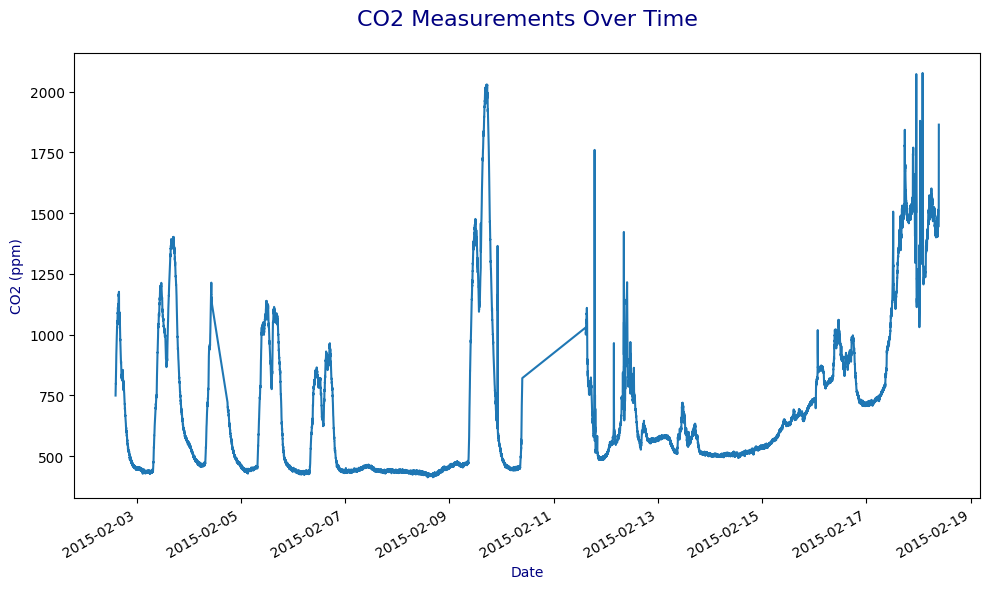

In [ ]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')

print("Available Dates:")
print(df.index.unique())

# Plot for CO2 measurements over time
plt.figure(figsize=(10, 6))
df['co2'].plot()

plt.title('CO2 Measurements Over Time', fontsize=16, color='navy', pad=20)
plt.xlabel('Date', color='navy')
plt.ylabel('CO2 (ppm)', color='navy')

plt.tight_layout()
plt.savefig('/content/images/co2_measurements_over_time.jpg', dpi=200)
plt.show()

Available Dates:
DatetimeIndex(['2015-02-02 14:19:00', '2015-02-02 14:20:00',
               '2015-02-02 14:21:00', '2015-02-02 14:22:00',
               '2015-02-02 14:23:00', '2015-02-02 14:24:00',
               '2015-02-02 14:25:00', '2015-02-02 14:26:00',
               '2015-02-02 14:27:00', '2015-02-02 14:28:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:11:00',
               '2015-02-18 09:12:00', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:17:00',
               '2015-02-18 09:18:00', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', name='date', length=20560, freq=None)


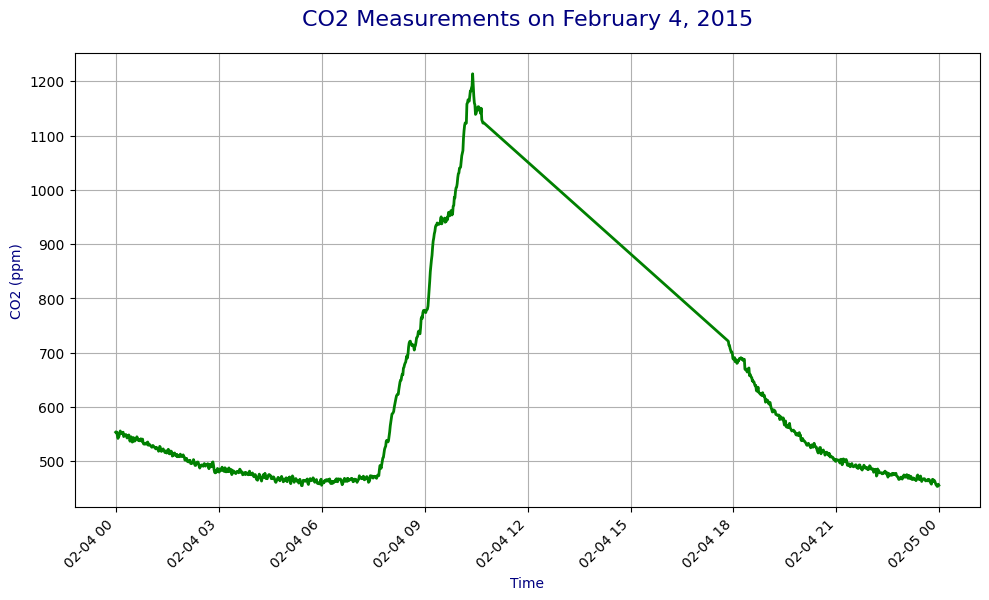

CO2 values from 17:51 to 18:00 on February 4, 2015:
                            co2
date                           
2015-02-04 17:51:00  721.250000
2015-02-04 17:52:00  714.000000
2015-02-04 17:53:00  713.500000
2015-02-04 17:54:00  708.250000
2015-02-04 17:55:00  704.500000
2015-02-04 17:56:00  701.000000
2015-02-04 17:57:00  701.666667
2015-02-04 17:58:00  699.000000
2015-02-04 17:59:00  689.333333
2015-02-04 18:00:00  688.000000


In [ ]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')

print("Available Dates:")
print(df.index.unique())

filtered_data = df[df.index.date == pd.to_datetime('2015-02-04').date()]

filtered_data.sort_index(inplace=True)

plt.figure(figsize=(10, 6))
filtered_data['co2'].plot(color='green', linewidth=2)
plt.title('CO2 Measurements on February 4, 2015', fontsize=16, color='navy', pad=20)
plt.xlabel('Time', color='navy')
plt.ylabel('CO2 (ppm)', color='navy')
plt.grid()
plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('/content/images/co2_measurements_feb_4_2015.jpg', dpi=200)
plt.show()

start_time = pd.to_datetime('2015-02-04 17:51:00')
end_time = pd.to_datetime('2015-02-04 18:00:00')

time_range_values = filtered_data[start_time:end_time]
print("CO2 values from 17:51 to 18:00 on February 4, 2015:")
print(time_range_values[['co2']])

Available dates in the DataFrame index:
DatetimeIndex(['2015-02-02 14:19:00', '2015-02-02 14:20:00',
               '2015-02-02 14:21:00', '2015-02-02 14:22:00',
               '2015-02-02 14:23:00', '2015-02-02 14:24:00',
               '2015-02-02 14:25:00', '2015-02-02 14:26:00',
               '2015-02-02 14:27:00', '2015-02-02 14:28:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:11:00',
               '2015-02-18 09:12:00', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:17:00',
               '2015-02-18 09:18:00', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', name='date', length=20560, freq=None)


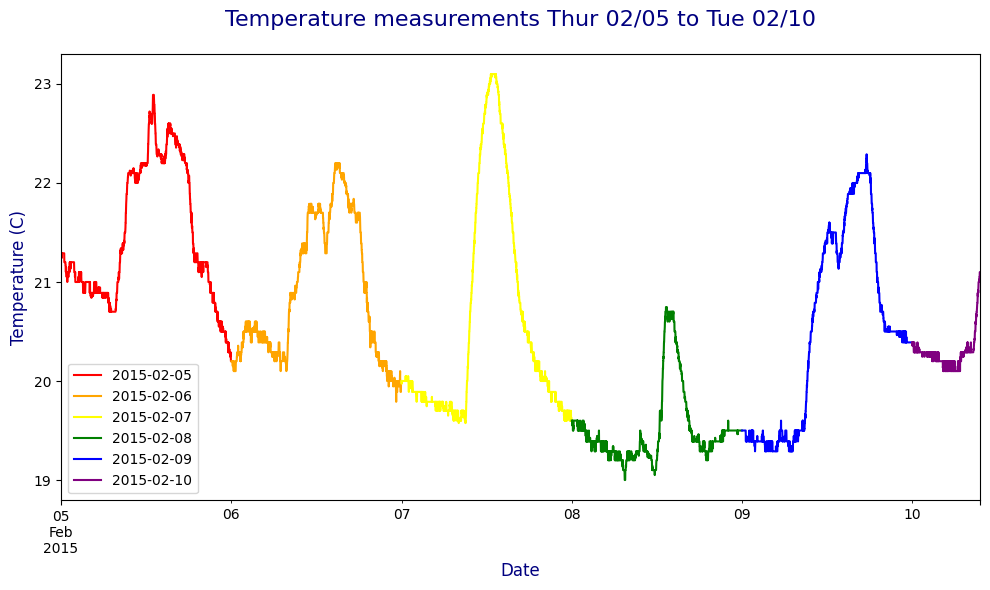

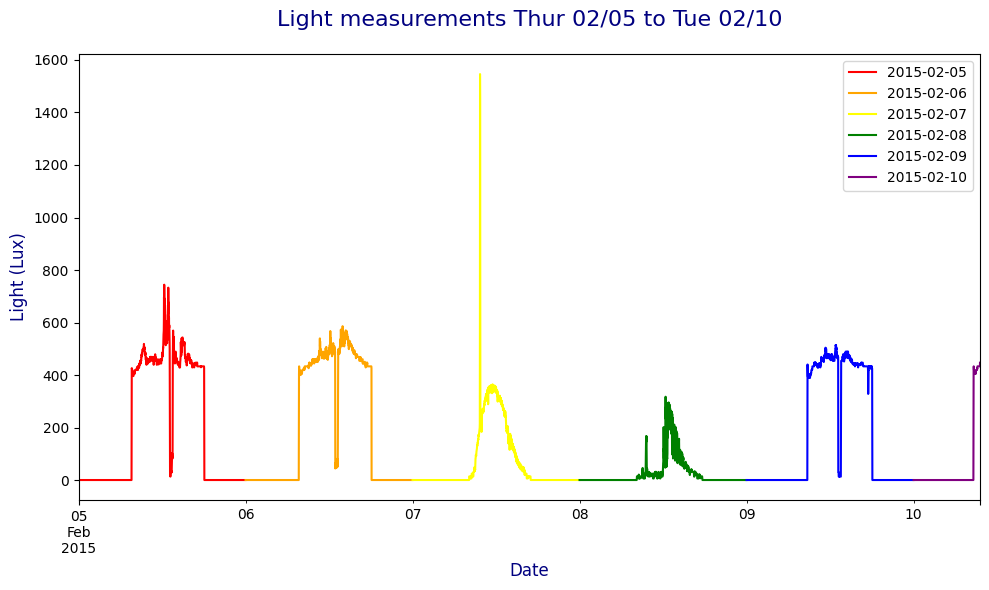

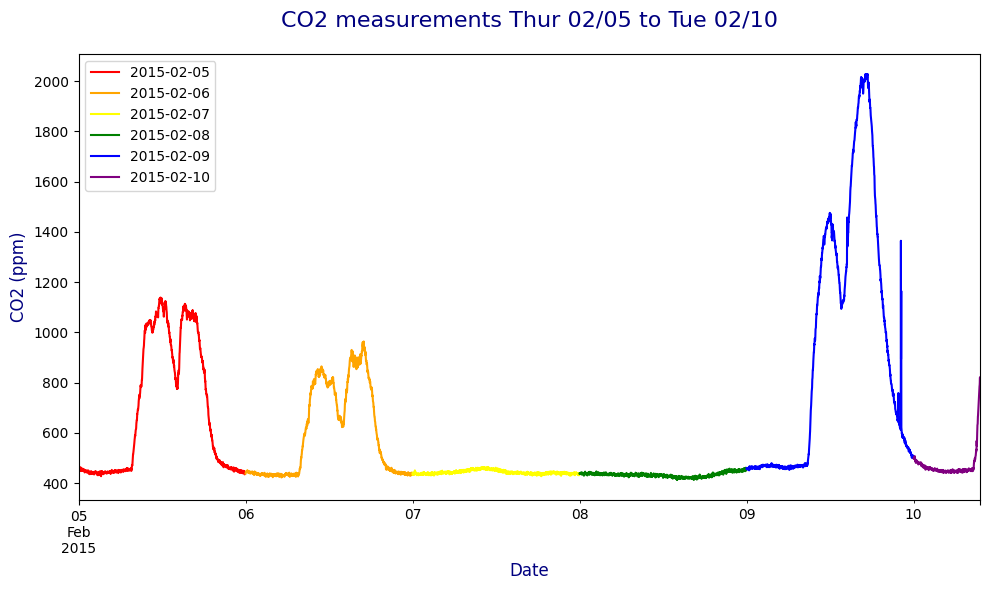

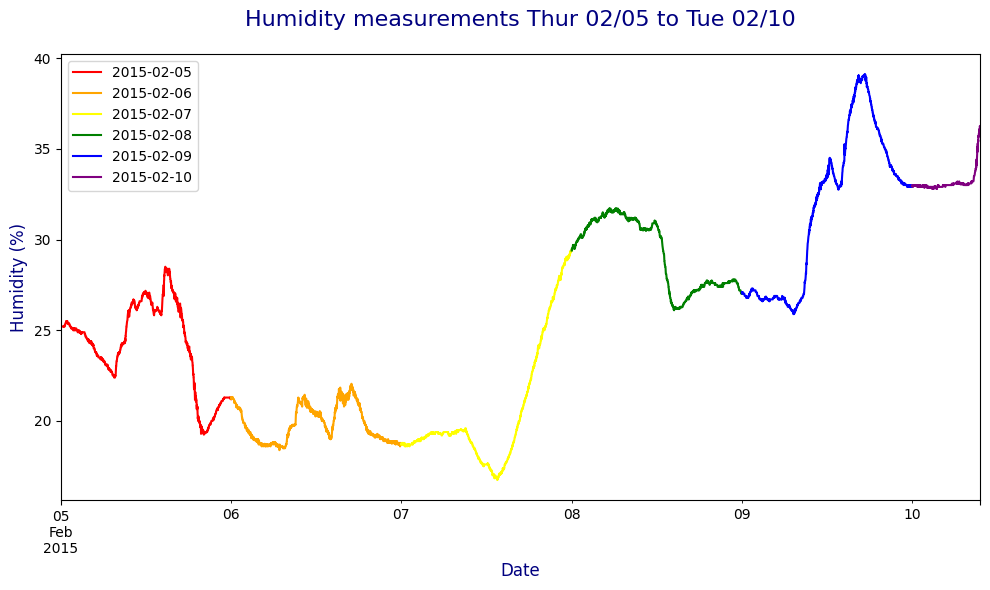

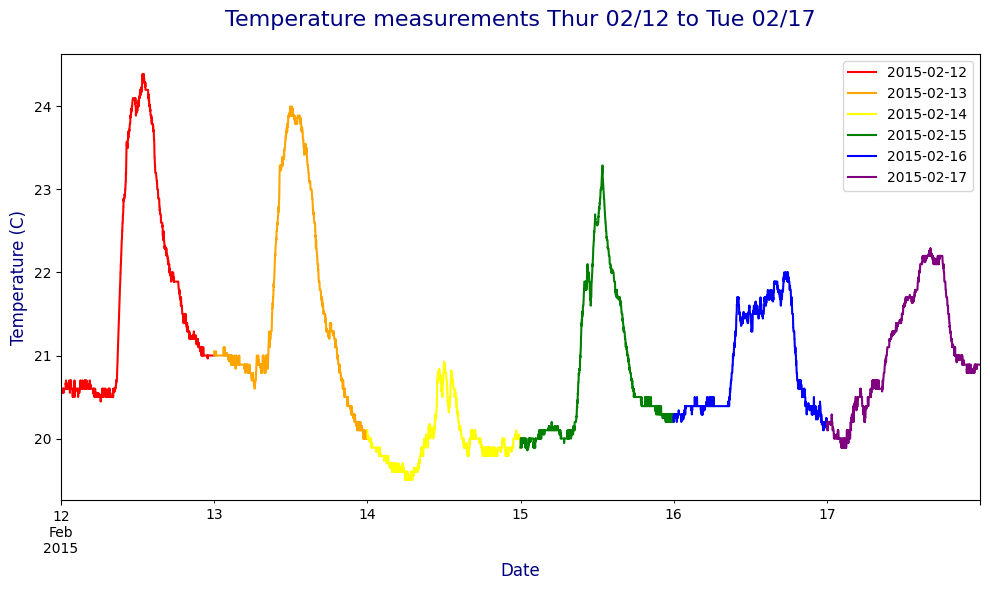

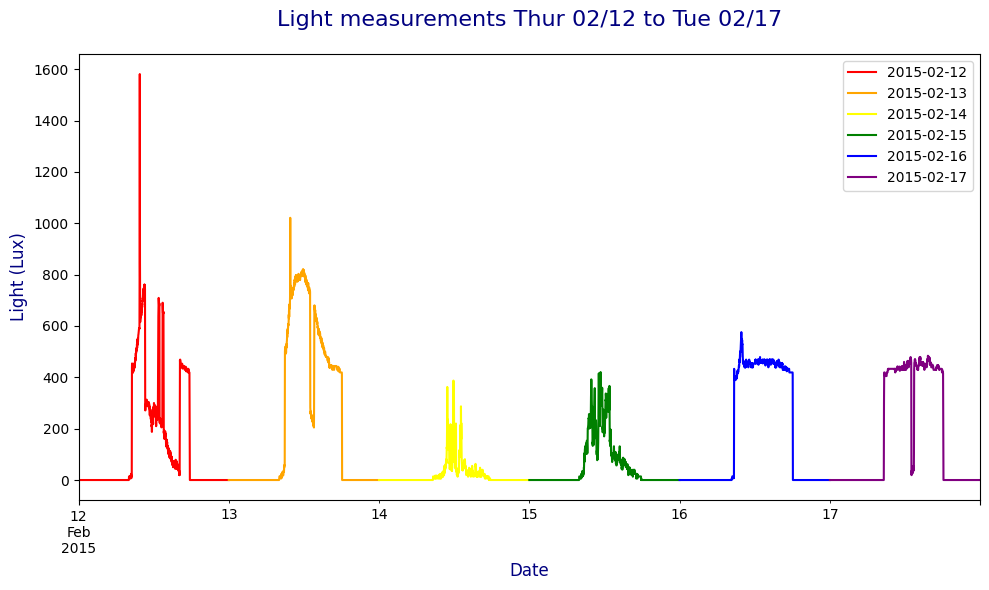

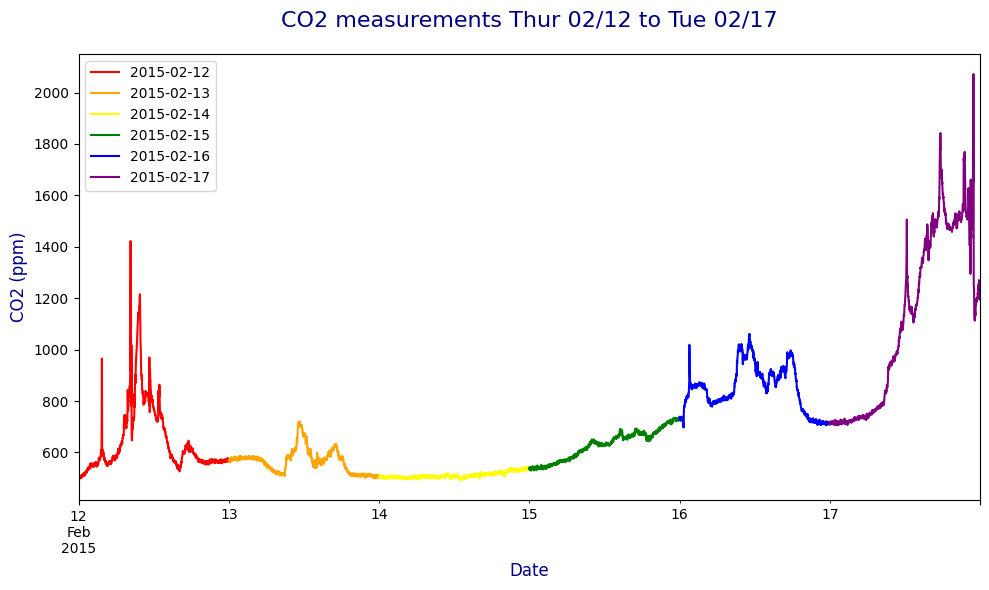

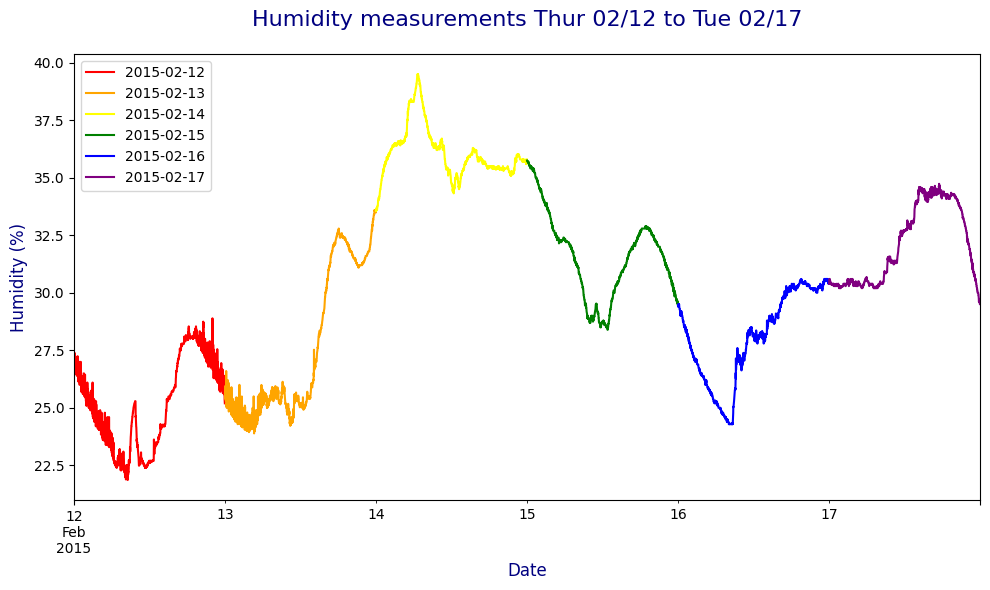

In [ ]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')

df.sort_index(inplace=True)

print("Available dates in the DataFrame index:")
print(df.index)

xs = ['temperature', 'light', 'co2', 'humidity']
title = ['Temperature', 'Light', 'CO2', 'Humidity']
unit = ['C', 'Lux', 'ppm', '%']
label_color = 'navy'
title_fontsize = 16
label_fontsize = 12
title_color = 'navy'
title_pad = 20

output_dir = '/content/images/'
os.makedirs(output_dir, exist_ok=True)

# Week 1 comparison (02/05 - 02/10)
for i, x in enumerate(xs):
    plt.figure(figsize=(10, 6))

    df.loc['2015-02-05', x].plot(color='red', label='2015-02-05')
    df.loc['2015-02-06', x].plot(color='orange', label='2015-02-06')
    df.loc['2015-02-07', x].plot(color='yellow', label='2015-02-07')
    df.loc['2015-02-08', x].plot(color='green', label='2015-02-08')
    df.loc['2015-02-09', x].plot(color='blue', label='2015-02-09')
    df.loc['2015-02-10', x].plot(color='purple', label='2015-02-10')

    plt.title(f'{title[i]} measurements Thur 02/05 to Tue 02/10', fontsize=title_fontsize, color=title_color, pad=title_pad)
    plt.xlabel('Date', color=label_color, fontsize=label_fontsize)
    plt.ylabel(f'{title[i]} ({unit[i]})', color=label_color, fontsize=label_fontsize)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(f'{output_dir}week1_{x}.jpg', dpi=200)
    plt.show()

# Week 2 comparison (02/12 - 02/17)
for i, x in enumerate(xs):
    plt.figure(figsize=(10, 6))

    df.loc['2015-02-12', x].plot(color='red', label='2015-02-12')
    df.loc['2015-02-13', x].plot(color='orange', label='2015-02-13')
    df.loc['2015-02-14', x].plot(color='yellow', label='2015-02-14')
    df.loc['2015-02-15', x].plot(color='green', label='2015-02-15')
    df.loc['2015-02-16', x].plot(color='blue', label='2015-02-16')
    df.loc['2015-02-17', x].plot(color='purple', label='2015-02-17')

    plt.title(f'{title[i]} measurements Thur 02/12 to Tue 02/17', fontsize=title_fontsize, color=title_color, pad=title_pad)
    plt.xlabel('Date', color=label_color, fontsize=label_fontsize)
    plt.ylabel(f'{title[i]} ({unit[i]})', color=label_color, fontsize=label_fontsize)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(f'{output_dir}week2_{x}.jpg', dpi=200)
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = df.copy()
df_sc[['temperature', 'light', 'co2', 'humidity']] = scaler.fit_transform(df[['temperature', 'light', 'co2', 'humidity']])
print(df_sc.columns)

Index(['temperature', 'humidity', 'light', 'co2', 'humidityratio',
       'occupancy'],
      dtype='object')


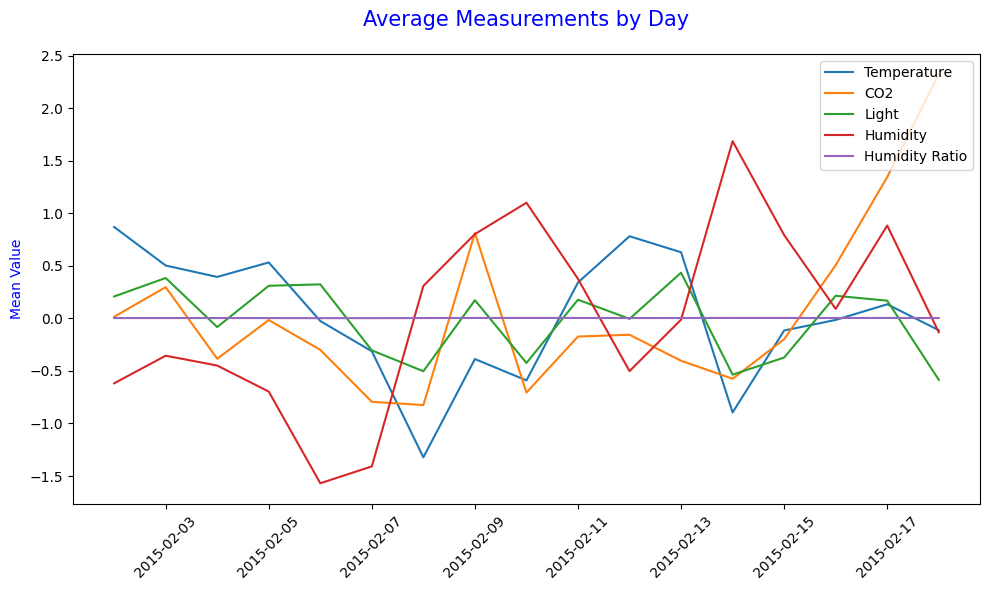

In [ ]:
# Calculate mean values by day
mean_temp_by_day = df_sc.resample('D').mean()['temperature']
mean_co2_by_day = df_sc.resample('D').mean()['co2']
mean_light_by_day = df_sc.resample('D').mean()['light']
mean_humidity_by_day = df_sc.resample('D').mean()['humidity']
mean_humidity_ratio_by_day = df_sc.resample('D').mean()['humidityratio']  # Updated column name
dates = df_sc.resample('D').mean().index

# Plot the average measurements
plt.figure(figsize=(10, 6))
plt.plot(dates, mean_temp_by_day, label='Temperature')
plt.plot(dates, mean_co2_by_day, label='CO2')
plt.plot(dates, mean_light_by_day, label='Light')
plt.plot(dates, mean_humidity_by_day, label='Humidity')
plt.plot(dates, mean_humidity_ratio_by_day, label='Humidity Ratio')  # This now matches the correct column name
plt.title('Average Measurements by Day', fontsize=15, pad=20, color='blue')
plt.xticks(rotation=45)
plt.ylabel('Mean Value', color='blue')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('/content/images/fig16.jpg', dpi=200)
plt.show()

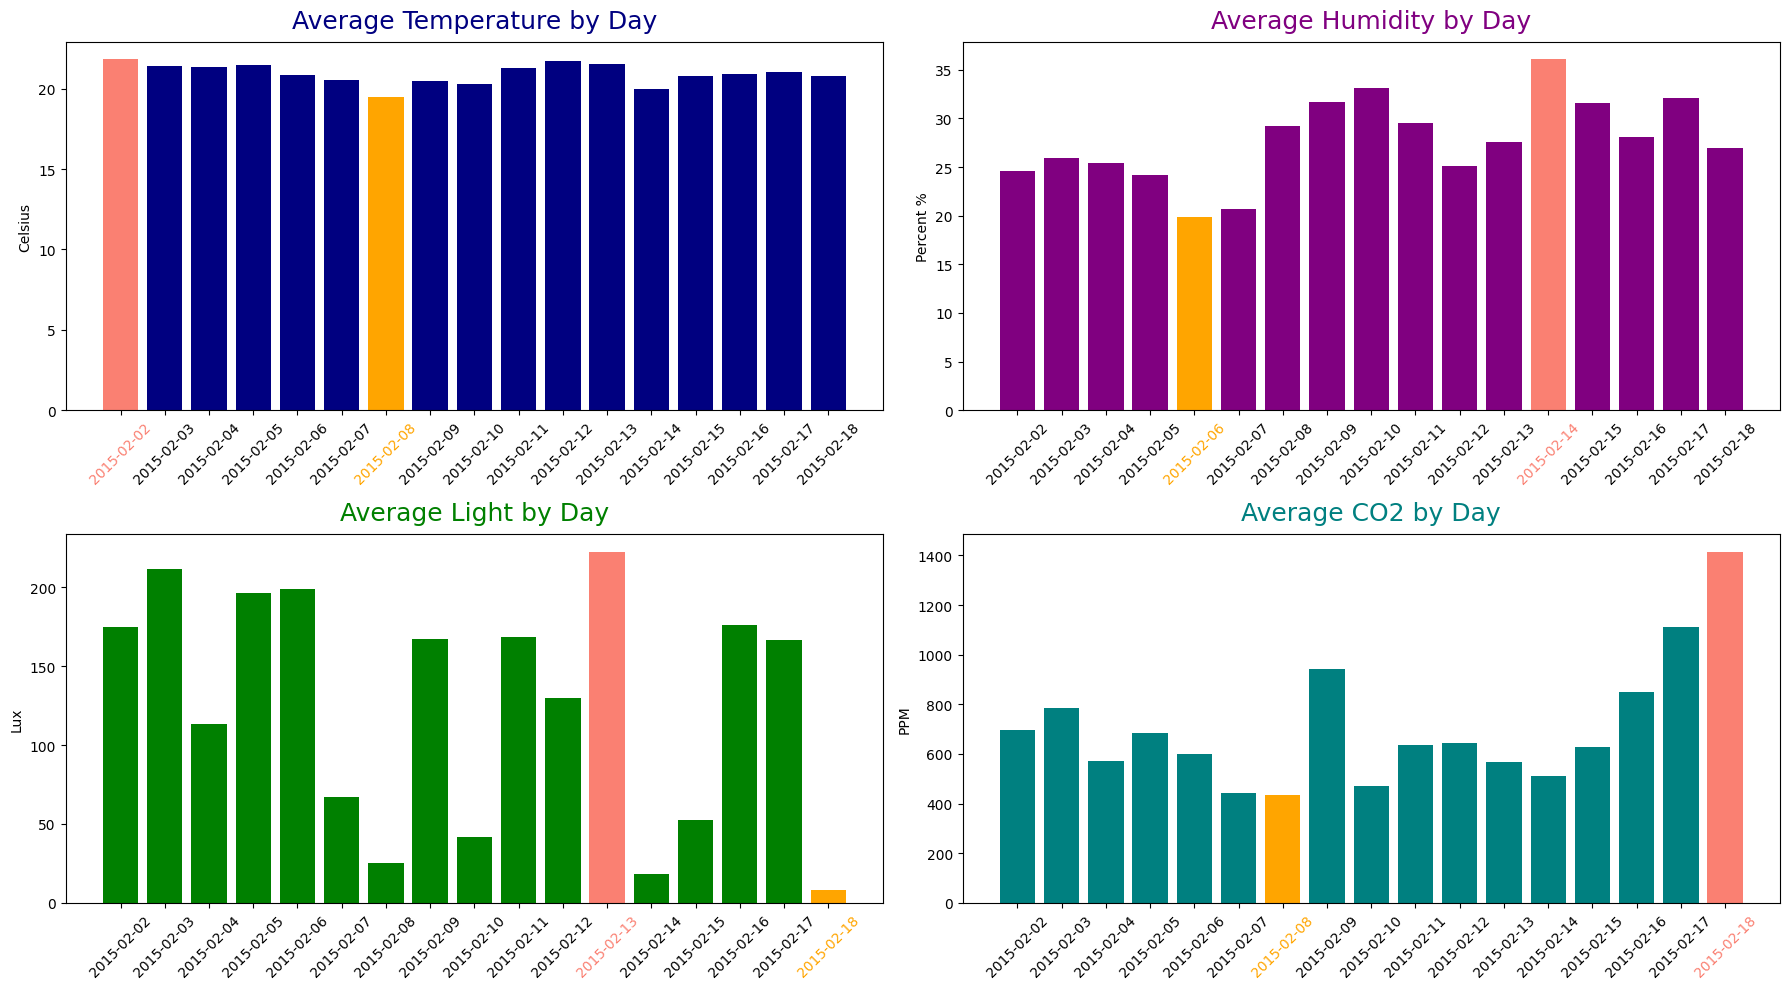

In [ ]:
# Plotting average measurements with highlighted min/max values
xaxes = ['temperature', 'humidity', 'light', 'co2']
yaxes = ['Celsius', 'Percent %', 'Lux', 'PPM']
titles = ['Temperature', 'Humidity', 'Light', 'CO2']
colors = ['navy', 'purple', 'green', 'teal']
dates = df.resample('D').mean().index

f, a = plt.subplots(2, 2, figsize=(18, 10))
a = a.ravel()

for idx, ax in enumerate(a):
    ax.xaxis.set_visible(True)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    values = df.resample('D').mean()[xaxes[idx]].values
    clrs = ['salmon' if (x == max(values)) else colors[idx] for x in values]
    max_id = clrs.index('salmon')
    clrs = ['orange' if (x == min(values)) else colors[idx] for x in values]
    clrs[max_id] = 'salmon'
    min_id = clrs.index('orange')

    ax.bar(dates, df.resample('D').mean()[xaxes[idx]], color=clrs)
    ax.set_title('Average ' + titles[idx] + ' by Day', fontsize=18, color=colors[idx], pad=10)
    ax.set_xticks(dates)
    ax.get_xticklabels()[max_id].set_color('salmon')
    ax.get_xticklabels()[min_id].set_color('orange')
    ax.set_ylabel(yaxes[idx])

plt.tight_layout()
f.savefig('/content/images/fig25.jpg')
plt.show()

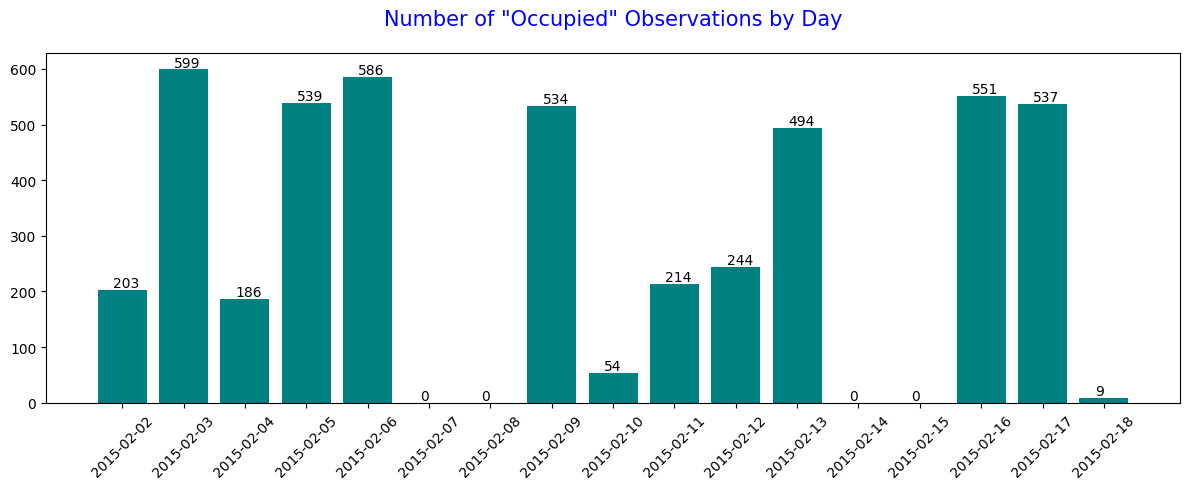

In [ ]:
# Number of "Occupied" type observations by day
occupancy_by_day = df['occupancy'].resample('D').sum()
dates = df['occupancy'].resample('D').sum().index

plt.figure(figsize=(12, 5))
bars = plt.bar(dates, occupancy_by_day, color='teal')
plt.title('Number of "Occupied" Observations by Day', fontsize=15, pad=20, color='blue')
plt.xticks(dates, rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.25, yval + 5, yval)

plt.tight_layout()
plt.savefig('/content/images/fig17.jpg', dpi=200)
plt.show()

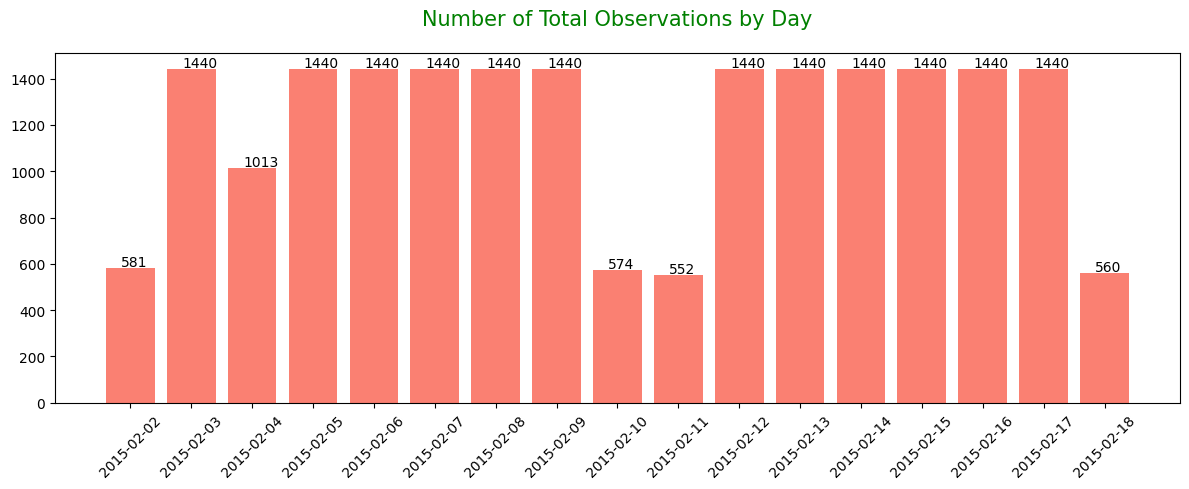

In [ ]:
# Total observations by day
observations_by_day = df['occupancy'].resample('D').count()
dates = df['occupancy'].resample('D').sum().index

plt.figure(figsize=(12, 5))
bars = plt.bar(dates, observations_by_day, color='salmon')
plt.title('Number of Total Observations by Day', fontsize=15, pad=20, color='green')
plt.xticks(dates, rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.25, yval + 10, yval)

plt.tight_layout()
plt.savefig('/content/images/fig18.jpg', dpi=200)
plt.show()

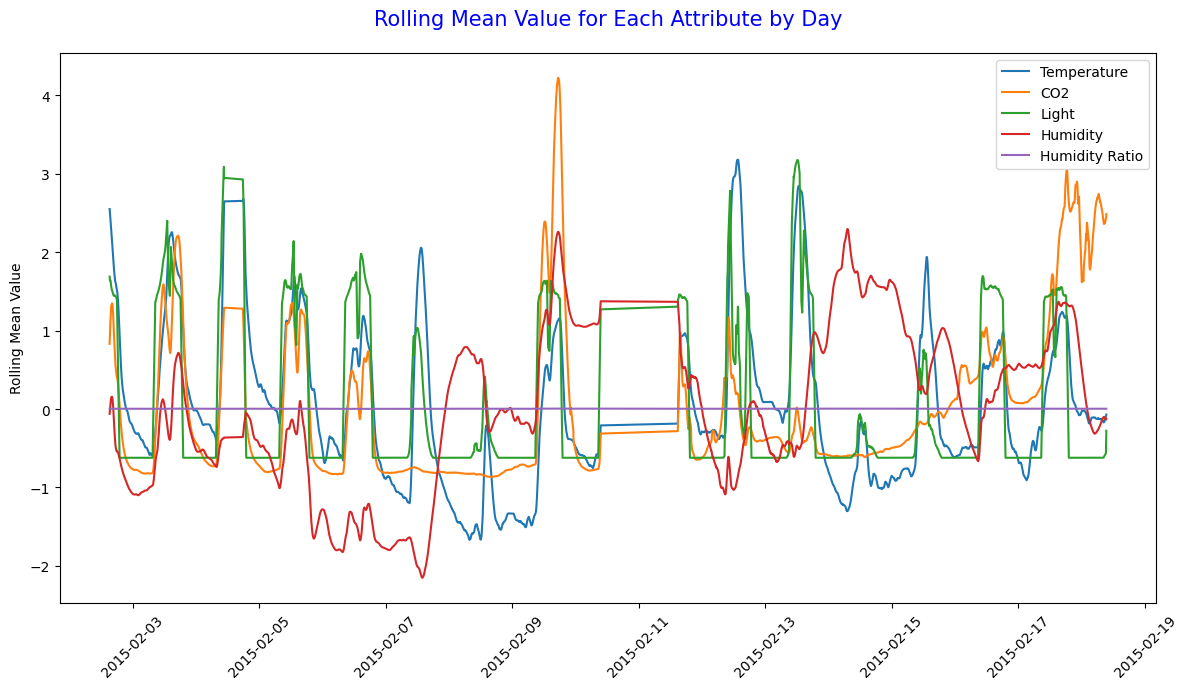

In [ ]:
# Calculate rolling means for attributes
temp_roll_mean = df_sc.rolling(60).mean()['temperature']
co2_roll_mean = df_sc.rolling(60).mean()['co2']
light_roll_mean = df_sc.rolling(60).mean()['light']
humidity_roll_mean = df_sc.rolling(60).mean()['humidity']
humidity_ratio = df_sc.rolling(60).mean()['humidityratio']
dates = df_sc.index

plt.figure(figsize=(12, 7))
plt.plot(dates, temp_roll_mean, label='Temperature')
plt.plot(dates, co2_roll_mean, label='CO2')
plt.plot(dates, light_roll_mean, label='Light')
plt.plot(dates, humidity_roll_mean, label='Humidity')
plt.plot(dates, humidity_ratio, label='Humidity Ratio')
plt.title('Rolling Mean Value for Each Attribute by Day', fontsize=15, pad=20, color='blue')
plt.xticks(rotation=45)
plt.ylabel('Rolling Mean Value')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('/content/images/fig19.jpg', dpi=200)
plt.show()

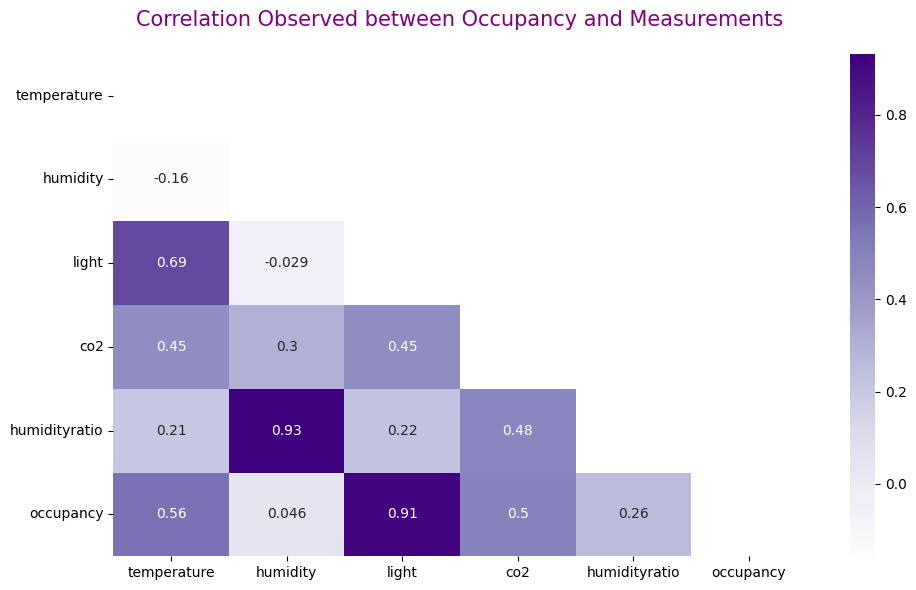

In [ ]:
# Correlation analysis
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='Purples')
plt.title('Correlation Observed between Occupancy and Measurements', fontsize=15, pad=20, color='purple')
plt.tight_layout()
plt.savefig('/content/images/fig20.jpg', dpi=200)
plt.show()

# **MODEL TRAINING AND TESTING**

**CALLING THE FUNCTIONS FILE**

In [ ]:
from functions import run_model, test_model, to_snake_case, round_up_time

**RANDOM FOREST MODEL TRAINING**

In [ ]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Load preprocessed data from the occupancy.p file
data_path = '/content/occupancy.p'  # Path to the occupancy.p file
df = pickle.load(open(data_path, 'rb'))

# Convert the date column to numerical features
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

# Drop the original 'date' column
df.drop(columns=['date'], inplace=True)

# Define model parameters for Random Forest
model_name = 'random_forest'
model_type = 'RandomForestClassifier'

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100],  # Reduced the number of trees in the forest
    'max_depth': [None, 10],     # Fewer depth options
    'min_samples_split': [2],    # Only one value for split
    'min_samples_leaf': [1],     # Only one value for leaf
}

# Specify the target column and feature columns
target_column = 'occupancy'
feature_columns = [col for col in df.columns if col != target_column]

# Prepare the data (split into train/test)
X = df[feature_columns]
y = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run the model training using GridSearchCV with parallelization
model = RandomForestClassifier()

# Enable parallelization with n_jobs=-1 to use all available cores
grid_search = GridSearchCV(
    model, param_grid, cv=5, n_jobs=-1, verbose=1
)

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the results and display class distribution
print("Class distribution:")
print(y.value_counts())  # Display class distribution for target 'occupancy'
print(f"Best model parameters: {best_params}")
print(f"Best model: {best_model}")

# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Save the training results to a CSV file
# Assuming grid_search.cv_results_ is a DataFrame, we save it to CSV
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('/content/training_results.csv', index=False)

# Save the best model to a file
with open(f'/content/{model_name}_best_model.sav', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model training completed. Results saved to 'training_results.csv' and the model saved as a .sav file.")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Class distribution:
occupancy
0    15810
1     4750
Name: count, dtype: int64
Best model parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best model: RandomForestClassifier()
Test accuracy: 0.9956225680933852
Model training completed. Results saved to 'training_results.csv' and the model saved as a .sav file.


**LINEAR DISCRIMINANT ANALYSIS (LDA) MODEL TRAINING**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import pickle

# Load the dataset
data_path = '/content/occupancy.p'
df = pickle.load(open(data_path, 'rb'))

# Preprocess the data
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

# Drop the original 'date' column
df.drop(columns=['date'], inplace=True)

X = df.drop('occupancy', axis=1)  # Features
y = df['occupancy']  # Target

# Check class distribution
print(f"Class distribution:\n{y.value_counts()}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# If the number of features is too high, PCA can help stabilize LDA
pca = PCA(n_components=min(X_scaled.shape[1], len(np.unique(y)) - 1))
X_pca = pca.fit_transform(X_scaled)
print(f"Number of components after PCA: {X_pca.shape[1]}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and set up LDA with regularization
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

# Set up hyperparameter tuning with GridSearchCV
param_grid = {
    'solver': ['lsqr', 'eigen'],  # Removed 'svd' as it doesn't support n_components
    'shrinkage': [None, 'auto']  # Added shrinkage for regularization
    # 'n_components': [1]       # Removed, as PCA already reduced to 1 component
}
grid_search = GridSearchCV(lda, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and the best parameters
best_model = grid_search.best_estimator_
print(f"Best model parameters: {grid_search.best_params_}")

results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('/content/trainingLDA_results.csv', index=False)

with open('/content/lda_best_model.sav', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model training completed. Results saved to 'training_results.csv' and the model saved as 'lda_best_model.sav'.")

# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

Class distribution:
occupancy
0    15810
1     4750
Name: count, dtype: int64
Number of components after PCA: 1
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best model parameters: {'shrinkage': None, 'solver': 'lsqr'}
Model training completed. Results saved to 'training_results.csv' and the model saved as 'lda_best_model.sav'.
Test accuracy: 0.8156614785992218


# **TRAINED MODEL ANALYSIS**

Random Forest Model Features:
['temperature' 'humidity' 'light' 'co2' 'humidityratio' 'year' 'month'
 'day' 'hour' 'minute']
Random Forest Accuracy: 0.9992217898832685
Random Forest Confusion Matrix:
[[3950    3]
 [   1 1186]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3953
           1       1.00      1.00      1.00      1187

    accuracy                           1.00      5140
   macro avg       1.00      1.00      1.00      5140
weighted avg       1.00      1.00      1.00      5140

Random Forest AUC: 0.9999871062916821


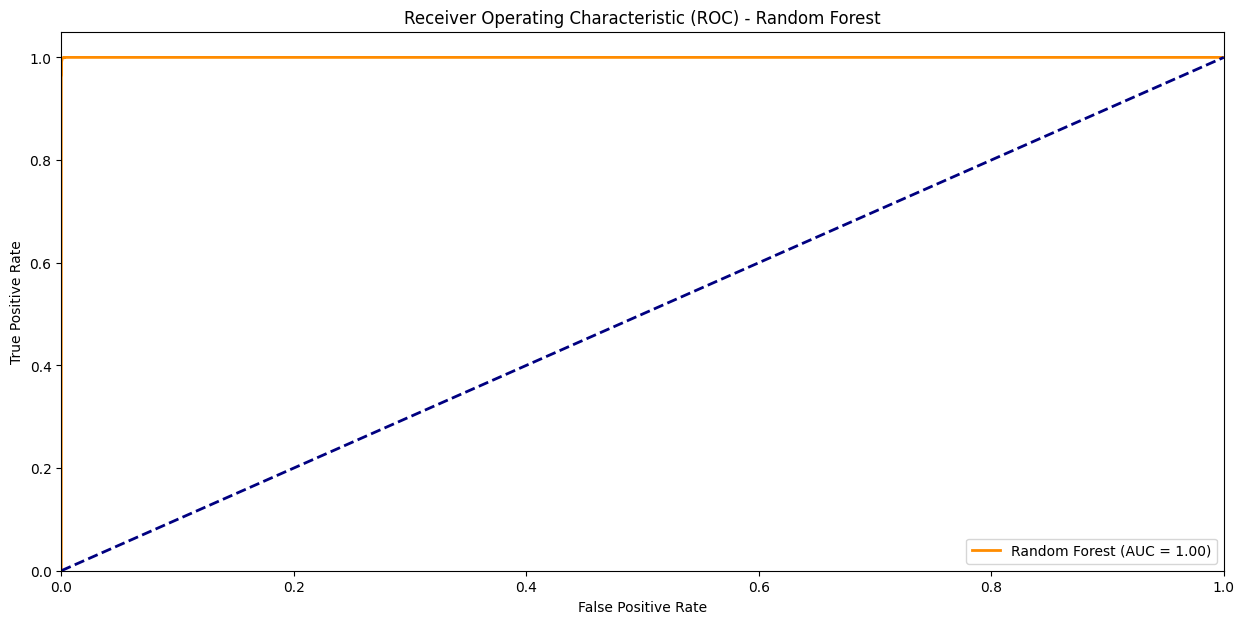

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

LDA Accuracy: 0.23093385214007783
LDA Confusion Matrix:
[[   0 3953]
 [   0 1187]]
LDA Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3953
           1       0.23      1.00      0.38      1187

    accuracy                           0.23      5140
   macro avg       0.12      0.50      0.19      5140
weighted avg       0.05      0.23      0.09      5140

LDA AUC: 0.8875943558377916


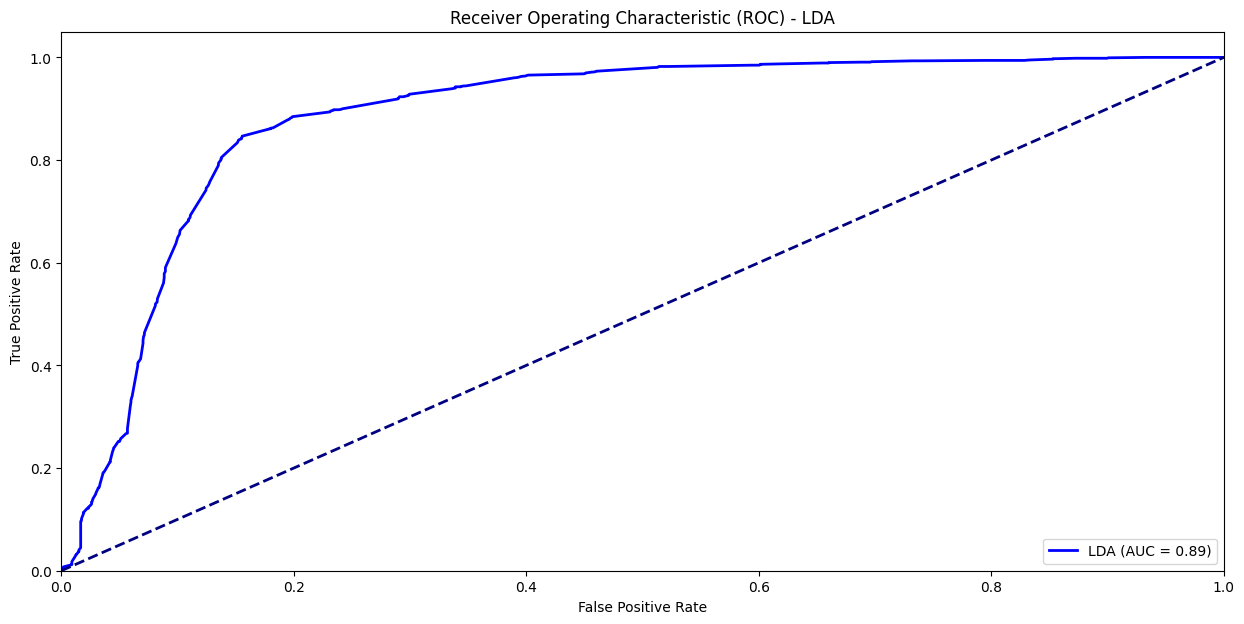

Comparison of Random Forest and LDA models:
Random Forest Accuracy: 0.9992217898832685
LDA Accuracy: 0.23093385214007783
Random Forest AUC: 0.9999871062916821
LDA AUC: 0.8875943558377916


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import pickle
import pandas as pd

# Load the best models
rf_model_path = '/content/random_forest_best_model.sav'
lda_model_path = '/content/lda_best_model.sav'

with open(rf_model_path, 'rb') as rf_file:
    rf_model = pickle.load(rf_file)

with open(lda_model_path, 'rb') as lda_file:
    lda_model = pickle.load(lda_file)

# Get the features used during training the Random Forest model
print("Random Forest Model Features:")
print(rf_model.feature_names_in_)  # Feature names used during training

# Ensure X_test contains all required features for Random Forest
# List of features used in training (ensure they match exactly)
rf_features = rf_model.feature_names_in_

# Check if X_test contains all the columns required for Random Forest
missing_columns = [col for col in rf_features if col not in X_test.columns]
if missing_columns:
    print(f"Warning: Missing columns in X_test for Random Forest: {missing_columns}")
else:
    # Reorder the columns based on the training features
    X_test_rf = X_test[rf_features]

# Ensure X_test for LDA only contains the 'temperature' feature
X_test_lda = X_test[['temperature']]  # Features for LDA (LDA uses only 'temperature')

# Step 1: Evaluate Random Forest Model
try:
    rf_predictions = rf_model.predict(X_test_rf)
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    print(f"Random Forest Accuracy: {rf_accuracy}")

    # Confusion Matrix for Random Forest
    rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
    print("Random Forest Confusion Matrix:")
    print(rf_conf_matrix)

    # Classification Report for Random Forest
    print("Random Forest Classification Report:")
    print(classification_report(y_test, rf_predictions))

    # ROC Curve for Random Forest
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test_rf)[:, 1])  # Using X_test_rf
    rf_auc = auc(rf_fpr, rf_tpr)
    print(f"Random Forest AUC: {rf_auc}")

    # Plot ROC Curve for Random Forest
    plt.figure()
    plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
    plt.legend(loc='lower right')
    plt.savefig('/content/images/fig27.jpg', dpi=200)
    plt.show()

except ValueError as e:
    print(f"Error with Random Forest Model: {e}")

# Step 2: Evaluate LDA Model
lda_predictions = lda_model.predict(X_test_lda)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print(f"LDA Accuracy: {lda_accuracy}")

# Confusion Matrix for LDA
lda_conf_matrix = confusion_matrix(y_test, lda_predictions)
print("LDA Confusion Matrix:")
print(lda_conf_matrix)

# Classification Report for LDA
print("LDA Classification Report:")
print(classification_report(y_test, lda_predictions))

# ROC Curve for LDA
lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_test, lda_model.predict_proba(X_test_lda)[:, 1])  # Using X_test_lda
lda_auc = auc(lda_fpr, lda_tpr)
print(f"LDA AUC: {lda_auc}")

# Plot ROC Curve for LDA
plt.figure()
plt.plot(lda_fpr, lda_tpr, color='blue', lw=2, label=f'LDA (AUC = {lda_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - LDA')
plt.legend(loc='lower right')
plt.savefig('/content/images/fig28.jpg', dpi=200)
plt.show()

# Step 3: Compare Models
print("Comparison of Random Forest and LDA models:")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"LDA Accuracy: {lda_accuracy}")
print(f"Random Forest AUC: {rf_auc}")
print(f"LDA AUC: {lda_auc}")

**CONFUSION MATRIX FOR RANDOM FOREST ALGORITHM**

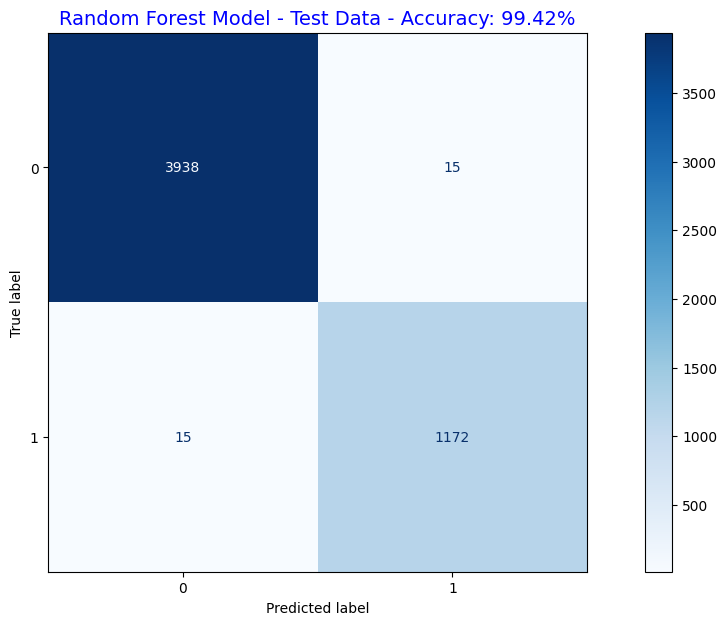

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Load the dataset
data = pd.read_csv('/content/combined_occupancy.csv')

# Feature engineering: creating time-based features (e.g., year, day, hour, minute)
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['month'] = data['date'].dt.month

# Define features and target variable
features = ['temperature', 'humidity', 'light', 'co2', 'humidityratio', 'year', 'day', 'hour', 'minute', 'month']
target = 'occupancy'

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=0)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)

# Customize the plot
plt.title(f"Random Forest Model - Test Data - Accuracy: {test_accuracy:.2f}%", fontsize=14, color="blue")
plt.savefig('/content/images/fig29.jpg', dpi=200)
plt.show()

In [ ]:
rf_model = RandomForestClassifier(random_state=0, class_weight='balanced') # This line should be moved before using rf_model

# Fit the Random Forest model first
rf_model.fit(X_train, y_train)
cm_rf = confusion_matrix(y_test, rf_model.predict(X_test))
cm_lda = confusion_matrix(y_test, lda_model.predict(X_test))

print("Random Forest Confusion Matrix:\n", cm_rf)
print("LDA Confusion Matrix:\n", cm_lda)
from sklearn.metrics import precision_score, recall_score, f1_score

rf_precision = precision_score(y_test, rf_model.predict(X_test))
rf_recall = recall_score(y_test, rf_model.predict(X_test))
rf_f1 = f1_score(y_test, rf_model.predict(X_test))

lda_precision = precision_score(y_test, lda_model.predict(X_test))
lda_recall = recall_score(y_test, lda_model.predict(X_test))
lda_f1 = f1_score(y_test, lda_model.predict(X_test))

print(f"Random Forest - Precision: {rf_precision}, Recall: {rf_recall}, F1-Score: {rf_f1}")
print(f"LDA - Precision: {lda_precision}, Recall: {lda_recall}, F1-Score: {lda_f1}")
rf_model = RandomForestClassifier(random_state=0, class_weight='balanced')
print(f"LDA Accuracy (from confusion matrix): {accuracy_lda * 100:.2f}%")
print(f"Random Forest Accuracy (from confusion matrix): {accuracy_rf * 100:.2f}%")

Random Forest Confusion Matrix:
 [[3937   16]
 [  15 1172]]
LDA Confusion Matrix:
 [[3892   61]
 [   5 1182]]
Random Forest - Precision: 0.9865319865319865, Recall: 0.987363100252738, F1-Score: 0.9869473684210527
LDA - Precision: 0.9509251810136766, Recall: 0.995787700084246, F1-Score: 0.9728395061728395
LDA Accuracy (from confusion matrix): 23.09%
Random Forest Accuracy (from confusion matrix): 99.44%


# **OCCUPANCY PREDICTION USING THE TRAINED RF MODEL**

In [ ]:
import pandas as pd
import pickle

data_path = '/datatest.csv'  # Path in Colab
data = pd.read_csv(data_path, parse_dates=['date'])  # Parse 'date' column as datetime
data['hour'] = data['date'].dt.hour  # Add hour feature

print(data.head())

   Unnamed: 0                date  Temperature  Humidity       Light  \
0         140 2015-02-02 14:19:00      23.7000    26.272  585.200000   
1         141 2015-02-02 14:19:00      23.7180    26.290  578.400000   
2         142 2015-02-02 14:21:00      23.7300    26.230  572.666667   
3         143 2015-02-02 14:22:00      23.7225    26.125  493.750000   
4         144 2015-02-02 14:23:00      23.7540    26.200  488.600000   

          CO2  HumidityRatio  Occupancy  hour  
0  749.200000       0.004764          1    14  
1  760.400000       0.004773          1    14  
2  769.666667       0.004765          1    14  
3  774.750000       0.004744          1    14  
4  779.000000       0.004767          1    14  


In [ ]:
with open('random_forest_best_model.sav', 'rb') as f:
    rf_model = pickle.load(f)

data = pd.read_csv('/datatest.csv')

# Parse the 'date' column and extract time-related features
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute

data.rename(columns={
    'Temperature': 'temperature',
    'Humidity': 'humidity',
    'Light': 'light',
    'CO2': 'co2',
    'HumidityRatio': 'humidityratio'
}, inplace=True)

features = ['temperature', 'humidity', 'light', 'co2', 'humidityratio', 'year', 'month', 'day', 'hour', 'minute']

# Ensure all required features are present
missing_features = [feature for feature in features if feature not in data.columns]
if missing_features:
    raise ValueError(f"Missing features in the dataset: {missing_features}")

# Predict occupancy using the trained model
data['Predicted_Occupancy'] = rf_model.predict(data[features])

print(data[['date', 'Predicted_Occupancy']].head())
print(data[['date', 'Predicted_Occupancy']].tail())
middle_start = 1037
middle_end = middle_start + 20  # to get 20 rows starting from 1039

print("Middle portion of the CSV file:")
print(data.iloc[middle_start:middle_end][['date', 'Predicted_Occupancy']])

output_path = '/content/predicted_occupancy.csv'
data[['date', 'Predicted_Occupancy']].to_csv(output_path, index=False)
print(f"Predictions saved to {output_path}")

                 date  Predicted_Occupancy
0 2015-02-02 14:19:00                    1
1 2015-02-02 14:19:00                    1
2 2015-02-02 14:21:00                    1
3 2015-02-02 14:22:00                    1
4 2015-02-02 14:23:00                    1
                    date  Predicted_Occupancy
2660 2015-02-04 10:38:00                    1
2661 2015-02-04 10:40:00                    1
2662 2015-02-04 10:40:00                    1
2663 2015-02-04 10:41:00                    1
2664 2015-02-04 10:43:00                    1
Middle portion of the CSV file:
                    date  Predicted_Occupancy
1037 2015-02-03 07:36:00                    1
1038 2015-02-03 07:37:00                    1
1039 2015-02-03 07:38:00                    1
1040 2015-02-03 07:38:00                    0
1041 2015-02-03 07:40:00                    0
1042 2015-02-03 07:40:00                    0
1043 2015-02-03 07:41:00                    0
1044 2015-02-03 07:43:00                    1
1045 2015-02-03 07:4

# **DECISION MAKING USING REINFORCEMNT LEARING FOR HVAC SYSTEMS**

In [ ]:
def hvac_control(temperature, occupancy):
    if occupancy == 1:  # Occupied
        if temperature < 21:
            return "Heat"
        elif temperature > 24:
            return "Cool"
        else:
            return "Maintain"
    else:  # Not occupied
        return "Off"

# Apply HVAC control logic
data['HVAC_Action'] = data.apply(
    lambda row: hvac_control(row['temperature'], row['Predicted_Occupancy']),
    axis=1
)

# Display results
print(data[['date', 'temperature', 'Predicted_Occupancy', 'HVAC_Action']].head())

                 date  temperature  Predicted_Occupancy HVAC_Action
0 2015-02-02 14:19:00      23.7000                    1    Maintain
1 2015-02-02 14:19:00      23.7180                    1    Maintain
2 2015-02-02 14:21:00      23.7300                    1    Maintain
3 2015-02-02 14:22:00      23.7225                    1    Maintain
4 2015-02-02 14:23:00      23.7540                    1    Maintain


In [ ]:
!pip install stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 23.6 MB/s eta 0:00:00


In [ ]:
!pip install shimmy>=2.0

In [ ]:
import gym
from stable_baselines3 import PPO

class HVACEnv(gym.Env):
    def __init__(self, data):
        super(HVACEnv, self).__init__()
        self.data = data
        self.current_step = 0
        self.state = None
        self.action_space = gym.spaces.Discrete(4)  # Actions: [Heat, Cool, Maintain, Off]
        self.observation_space = gym.spaces.Box(low=0, high=100, shape=(3,), dtype=float)

    def step(self, action):
        # Apply action and compute reward
        # Update state to next step
        reward = -abs(self.data['temperature'][self.current_step] - 22)  # Comfort zone around 22°C
        observation = self.data.iloc[self.current_step][['temperature', 'humidity', 'Predicted_Occupancy']]

        self.current_step += 1
        done = self.current_step >= len(self.data)
        return observation, reward, done, {}

    def reset(self):
        self.current_step = 0
        return self.data.iloc[self.current_step][['temperature', 'humidity', 'Predicted_Occupancy']]

# Instantiate environment
env = HVACEnv(data)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 617  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.66e+03    |
|    ep_rew_mean          | -2.89e+03   |
| time/                   |             |
|    fps                  | 456         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013695527 |
|    clip_fraction        | 0.0623      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.00529    |
|    learning_rate        | 0.0003      |
|    loss                 | 49.1        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.003

In [ ]:
output_path = '/content/hvac_predictions.csv'
data[['date', 'temperature', 'Predicted_Occupancy', 'HVAC_Action']].to_csv(output_path, index=False)

print(f"Predictions saved to {output_path}")

Predictions saved to /content/hvac_predictions.csv


In [ ]:
loaded_data = pd.read_csv(output_path)

print("Head of the CSV file:")
print(loaded_data.head())

middle_start = 1037
middle_end = middle_start + 10
print("Middle portion of the CSV file:")
print(loaded_data.iloc[middle_start:middle_end])


print("\nTail of the CSV file:")
print(loaded_data.tail())

Head of the CSV file:
                  date  temperature  Predicted_Occupancy HVAC_Action
0  2015-02-02 14:19:00      23.7000                    1    Maintain
1  2015-02-02 14:19:00      23.7180                    1    Maintain
2  2015-02-02 14:21:00      23.7300                    1    Maintain
3  2015-02-02 14:22:00      23.7225                    1    Maintain
4  2015-02-02 14:23:00      23.7540                    1    Maintain
Middle portion of the CSV file:
                     date  temperature  Predicted_Occupancy HVAC_Action
1037  2015-02-03 07:36:00       20.290                    1        Heat
1038  2015-02-03 07:37:00       20.290                    1        Heat
1039  2015-02-03 07:38:00       20.290                    1        Heat
1040  2015-02-03 07:38:00       20.290                    0         Off
1041  2015-02-03 07:40:00       20.315                    0         Off
1042  2015-02-03 07:40:00       20.290                    0         Off
1043  2015-02-03 07:41:00   